# NEUROKIT 2

Weslley Lioba Caldas

# IMPORTS

In [47]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import math
import seaborn as sns
import math


# Cardiac activity (ECG)

link: https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process

# ecg_process()

ecg_process(ecg_signal, sampling_rate=1000, method='neurokit')

**Automated pipeline for preprocessing an ECG signal**


**Parameters**
* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (str) – The processing pipeline to apply. Defaults to "neurokit".

**Returns**
* **signals** (DataFrame) – A DataFrame of the same length as the ecg_signal containing the following columns:

    * "ECG_Raw": the raw signal.

    * "ECG_Clean": the cleaned signal.

    * "ECG_R_Peaks": the R-peaks marked as “1” in a list of zeros.

    * "ECG_Rate": heart rate interpolated between R-peaks.

    * "ECG_P_Peaks": the P-peaks marked as “1” in a list of zeros

    * "ECG_Q_Peaks": the Q-peaks marked as “1” in a list of zeros .

    * "ECG_S_Peaks": the S-peaks marked as “1” in a list of zeros.

    * "ECG_T_Peaks": the T-peaks marked as “1” in a list of zeros.

    * "ECG_P_Onsets": the P-onsets marked as “1” in a list of zeros.

    * "ECG_P_Offsets": the P-offsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_T_Onsets": the T-onsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_T_Offsets": the T-offsets marked as “1” in a list of zeros.

    * "ECG_R_Onsets": the R-onsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_R_Offsets": the R-offsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_Phase_Atrial": cardiac phase, marked by “1” for systole and “0” for diastole.

    * "ECG_Phase_Ventricular": cardiac phase, marked by “1” for systole and “0” for diastole.

    * "ECG_Atrial_PhaseCompletion": cardiac phase (atrial) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * "ECG_Ventricular_PhaseCompletion": cardiac phase (ventricular) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * **This list is not up-to-date. Help us improve the documentation!**

* **info** (dict) – A dictionary containing the samples at which the R-peaks occur, accessible with the key "ECG_Peaks", as well as the signals’ sampling rate.

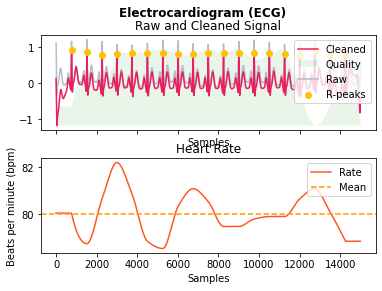

In [9]:
# Simulate ECG signal
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Preprocess ECG signal
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Visualize
nk.ecg_plot(signals)

# ecg_analyze()

ecg_analyze(data, sampling_rate=1000, method='auto')

Performs ECG analysis by computing relevant features and indices on either epochs (event-related analysis) or on longer periods of data (interval-related analysis), such as resting-state data.

**Parameters**
* **data** (Union[dict, pd.DataFrame]) – A dictionary of epochs, containing one DataFrame per epoch, usually obtained via epochs_create(), or a DataFrame containing all epochs, usually obtained via epochs_to_df(). Can also take a DataFrame of processed signals from a longer period of data, typically generated by ecg_process() or bio_process(). Can also take a dict containing sets of separate periods of data.

* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second). Defaults to 1000Hz.

* **method** (str) – Can be one of "event-related" for event-related analysis on epochs, or "interval-related" for analysis on longer periods of data. Defaults to auto, where the method will be chosen based on the mean duration of the data ("event-related" for duration under 10s).

**Returns**
DataFrame – A dataframe containing the analyzed ECG features. If event-related analysis is conducted, each epoch is indicated by the Label column. See ecg_eventrelated() and ecg_intervalrelated() docstrings for details.

In [10]:
# Download the data
data = nk.data("bio_eventrelated_100hz")

# Process the data for event-related analysis
df, info = nk.bio_process(ecg=data["ECG"], sampling_rate=100)

events = nk.events_find(data["Photosensor"], threshold_keep='below',
                        event_conditions=["Negative", "Neutral", "Neutral", "Negative"])


epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-0.1, epochs_end=1.9)

# Analyze
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=100)

# Get a dataframe with all the results
analyze_epochs

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,Negative,1024,58.962843,-0.034935,-3.875928,-2.279443,1.114000,0.010553,1.900000,-2.861522,-0.080625,0.999367,0.0,0.144578,1.0,0.400000,0.978231
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.690421,1.654065,0.010553,1.327136,-6.800245,0.283399,0.993256,0.0,0.880000,0.0,0.553846,0.912938
3,3,Neutral,9224,55.976284,4.674856,-1.922230,-0.282846,1.813644,1.900000,1.075879,-7.826192,0.941835,0.956162,0.0,0.044944,1.0,0.133333,0.919330
4,4,Negative,12984,57.505912,-0.010599,-3.800491,-1.378359,1.002110,0.010553,1.900000,-0.248683,-0.171035,0.990209,0.0,0.879518,0.0,0.575342,0.789760


In [11]:
# Download the resting-state data
data = nk.data("bio_resting_5min_100hz")

# Process the data
df, info = nk.ecg_process(data["ECG"], sampling_rate=100)

# Analyze
analyze_df = nk.ecg_analyze(df, sampling_rate=100)

# Get results
analyze_df

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,694.756381,49.036043,7.277185,48.83361,NaN,NaN,NaN,NaN,38.837766,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.832294,1.846507,2.722348,0.873124


# ecg_simulate()

ecg_simulate(duration=10, length=None, sampling_rate=1000, noise=0.01, heart_rate=70, heart_rate_std=1, method='ecgsyn', random_state=None, **kwargs)


Simulate an ECG/EKG signal: Generate an artificial (synthetic) ECG signal of a given duration and sampling rate using either the ECGSYN dynamical model (McSharry et al., 2003) or a simpler model based on Daubechies wavelets to roughly approximate cardiac cycles.

**Parameters**
* **duration** (int) – Desired recording length in seconds.

* **sampling_rate** (int) – The desired sampling rate (in Hz, i.e., samples/second).

* **length** (int) – The desired length of the signal (in samples).

* **noise** (float) – Noise level (amplitude of the laplace noise).

* **heart_rate** (int) – Desired simulated heart rate (in beats per minute). The default is 70. Note that for the "ECGSYN" method, random fluctuations are to be expected to mimick a real heart rate. These fluctuations can cause some slight discrepancies between the requested heart rate and the empirical heart rate, especially for shorter signals.

* **heart_rate_std** (int) – Desired heart rate standard deviation (beats per minute).

* **method** (str) – The model used to generate the signal. Can be "simple" for a simulation based on Daubechies wavelets that roughly approximates a single cardiac cycle. If "ecgsyn" (default), will use the model desbribed McSharry et al. (2003). If "multileads", will return a DataFrame containing 12-leads (see 12-leads ECG simulation).

* **random_state** (int) – Seed for the random number generator.

* ** **kwargs** – Other keywords parameters for ECGSYN algorithm, such as "lfhfratio", "ti", "ai", "bi".

**Returns**
array – Vector containing the ECG signal.

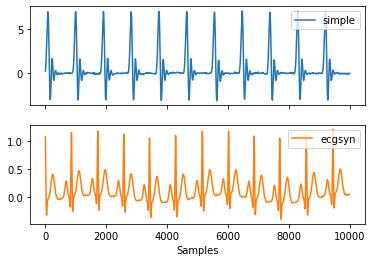

In [7]:
#
# simulando
ecg1 = nk.ecg_simulate(duration=10, method="simple")

ecg2 = nk.ecg_simulate(duration=10, method="ecgsyn")

# Visualize result
nk.signal_plot([ecg1, ecg2], labels=["simple", "ecgsyn"], subplots=True)

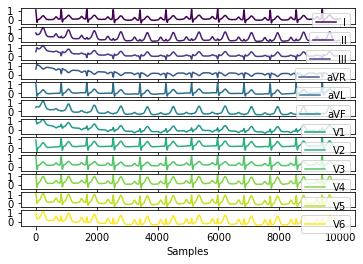

In [8]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize result
nk.signal_plot(ecg12, subplots=True)

# ecg_plot() 
ecg_plot(ecg_signals, rpeaks=None, sampling_rate=None, show_type='default')

**Visualize ECG data**

Plot ECG signals and R-peaks.

**Parameters**
* **ecg_signals** (DataFrame) – DataFrame obtained from ecg_process().

* **rpeaks** (dict) – The samples at which the R-peak occur. Dict returned by ecg_process(). Defaults to None.

* **sampling_rate** (int) – The sampling frequency of the ECG (in Hz, i.e., samples/second). Needs to be supplied if the data should be plotted over time in seconds. Otherwise the data is plotted over samples. Defaults to None. Must be specified to plot artifacts.

* **show_type** (str) – Visualize the ECG data with "default" or visualize artifacts thresholds with "artifacts" produced by ecg_fixpeaks(), or "full" to visualize both.

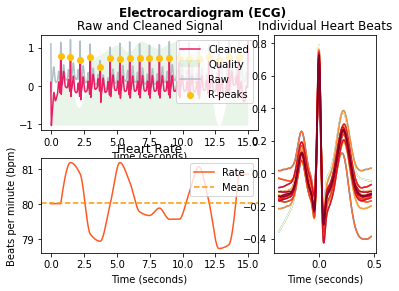

In [12]:
# Simulate data
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Process signal
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Plot
nk.ecg_plot(signals, sampling_rate=1000, show_type='default')

# ecg_clean()

ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit', **kwargs)

**ECG Signal Cleaning**

Clean an ECG signal to remove noise and improve peak-detection accuracy. Different cleaning method are implemented.

* 'neurokit' (default): 0.5 Hz high-pass butterworth filter (order = 5), followed by powerline filtering (see signal_filter()). By default, powerline = 50.

* 'biosppy': Same as in the biosppy package. Please help providing a better description!

* 'pantompkins1985': Method used in Pan & Tompkins (1985). Please help providing a better description!

* 'hamilton2002': Method used in Hamilton (2002). Please help providing a better description!

* 'elgendi2010': Method used in Elgendi et al. (2010). Please help providing a better description!

* 'engzeemod2012': Method used in Engelse & Zeelenberg (1979). Please help providing a better description!

**Parameters**
* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (str) – The processing pipeline to apply. Can be one of "neurokit" (default), "biosppy", "pantompkins1985", "hamilton2002", "elgendi2010", "engzeemod2012".

* ** **kwargs** – Other arguments to be passed to specific methods.

**Returns**
array – Vector containing the cleaned ECG signal.

<AxesSubplot:>

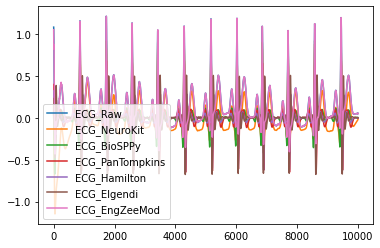

In [13]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

signals = pd.DataFrame({"ECG_Raw" : ecg,
                        "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=1000, method="neurokit"),
                        "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=1000, method="biosppy"),
                        "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=1000, method="pantompkins1985"),
                        "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=1000, method="hamilton2002"),
                        "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=1000, method="elgendi2010"),
                        "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=1000, method="engzeemod2012")})


signals.plot()


# ecg_quality()

ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=1000, method='averageQRS', approach=None)

**ECG Signal Quality Assessment**

Assess the quality of the ECG Signal using various methods:

* The "averageQRS" method computes a continuous index of quality of the ECG signal, by interpolating the distance of each QRS segment from the average QRS segment present in the * data. This index is therefore relative: 1 corresponds to heartbeats that are the closest to the average sample and 0 corresponds to the most distant heartbeat from that average sample. Note that 1 does not necessarily means “good”: if the majority of samples are bad, than being close to the average will likely mean bad as well. Use this index with care and plot it alongside your ECG signal to see if it makes sense.

* The "zhao2018" method (Zhao et al., 2018) extracts several signal quality indexes (SQIs): QRS wave power spectrum distribution pSQI, kurtosis kSQI, and baseline relative power basSQI. An additional R peak detection match qSQI was originally computed in the paper but left out in this algorithm. The indices were originally weighted with a ratio of [0.4, 0.4, 0.1, 0.1] to generate the final classification outcome, but because qSQI was dropped, the weights have been rearranged to [0.6, 0.2, 0.2] for pSQI, kSQI and basSQI respectively.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG signal in the form of a vector of values.

* **rpeaks** (tuple or list) – The list of R-peak samples returned by ecg_peaks(). If None, peaks is computed from the signal input.

* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second).

* **method (str)** – The method for computing ECG signal quality, can be "averageQRS" (default) or "zhao2018".

* **approach (str)** – The data fusion approach as documented in Zhao et al. (2018). Can be "simple" or "fuzzy". The former performs simple heuristic fusion of SQIs and the latter performs fuzzy comprehensive evaluation. If None (default), simple heuristic fusion is used.

* ** **kwargs** – Keyword arguments to be passed to signal_power() in the computation of basSQI and pSQI.

**Returns**
array or str – Vector containing the quality index ranging from 0 to 1 for "averageQRS" method, returns string classification (Unacceptable, Barely Acceptable or Excellent) of the signal for "zhao2018 method".

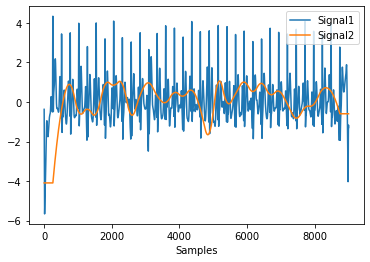

In [14]:
ecg = nk.ecg_simulate(duration=30, sampling_rate=300, noise=0.2)

ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=300)

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=300)

nk.signal_plot([ecg_cleaned, quality], standardize=True)

In [15]:
nk.ecg_quality(ecg_cleaned,
               sampling_rate=300,
               method="zhao2018",
               approach="fuzzy")

'Barely acceptable'

# ecg_rsp()
ecg_rsp(ecg_rate, sampling_rate=1000, method='vangent2019')

**ECG-Derived Respiration (EDR)**

Extract ECG-Derived Respiration (EDR), a proxy of a respiratory signal based on heart rate.

Different methods include:

* **vangent2019**: 0.1-0.4 Hz filter.

* **soni2019**: 0-0.5 Hz filter.

* **charlton2016**: 0.066-1 Hz filter.

* **sarkar2015**: 0.1-0.7 Hz filter.

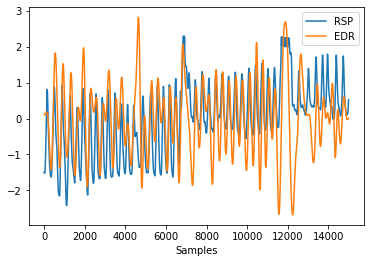

In [16]:
# Get heart rate
data = nk.data("bio_eventrelated_100hz")

rpeaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=100, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
data["EDR"] = nk.ecg_rsp(ecg_rate, sampling_rate=100)

# Visualize result
nk.signal_plot([data["RSP"], data["EDR"]], standardize = True)

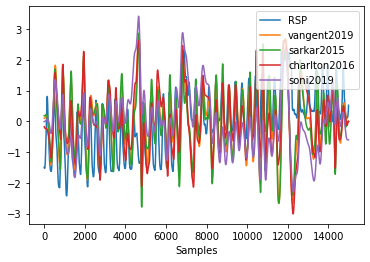

In [17]:
data["vangent2019"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="vangent2019")

data["sarkar2015"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="sarkar2015")

data["charlton2016"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="charlton2016")

data["soni2019"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="soni2019")

# Visualize results
nk.signal_plot([data["RSP"], data["vangent2019"], data["sarkar2015"],
                data["charlton2016"], data["soni2019"]], standardize = True)

# ecg_peaks()
ecg_peaks(ecg_cleaned, sampling_rate=1000, method='neurokit', correct_artifacts=False, **kwargs)

**Find R-peaks in an ECG signal**

Find R-peaks in an ECG signal using the specified method. The method accepts unfiltered ECG signals as input, although it is expected that a filtered (cleaned) ECG will result in better results.

Different algorithms for peak-detection include:


* **neurokit** (default): QRS complexes are detected based on the steepness of the absolute gradient of the ECG signal. Subsequently, R-peaks are detected as local maxima in the QRS complexes. Unpublished, but see https://github.com/neuropsychology/NeuroKit/issues/476

* **pantompkins1985**: Algorithm by Pan & Tompkins (1985).

* **hamilton2002**: Algorithm by Hamilton (2002).

* **zong2003**: Algorithm by Zong et al. (2003).

* **martinez2004**: Algorithm by Martinez et al (2004).

* **christov2004**: Algorithm by Christov (2004).

* **gamboa2008**: Algorithm by Gamboa (2008).

* **elgendi2010**: Algorithm by Elgendi et al. (2010).

* **engzeemod2012**: Original algorithm by Engelse & Zeelenberg (1979) modified by Lourenço et al. (2012).

* **kalidas2017**: Algorithm by Kalidas et al. (2017).

* **nabian2018**: Algorithm by Nabian et al. (2018) based on the Pan-Tompkins algorithm.

* **rodrigues2021**: Adaptation of the work by Sadhukhan & Mitra (2012) and Gutiérrez-Rivas et al. (2015) by Rodrigues et al. (2021).

* **promac**: ProMAC combines the result of several R-peak detectors in a probabilistic way. For a given peak detector, the binary signal representing the peak locations is convolved with a Gaussian distribution, resulting in a probabilistic representation of each peak location. This procedure is repeated for all selected methods and the resulting signals are accumulated. Finally, a threshold is used to accept or reject the peak locations. See this discussion for more information on the origins of the method: https://github.com/neuropsychology/NeuroKit/issues/222

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (string) – The algorithm to be used for R-peak detection.

* **correct_artifacts** (bool) – Whether or not to first identify and fix artifacts, using the method by Lipponen & Tarvainen (2019).

* ** **kwargs** – Additional keyword arguments, usually specific for each method.

**Returns**
* **signals** (DataFrame) – A DataFrame of same length as the input signal in which occurrences of R-peaks marked as 1 in a list of zeros with the same length as ecg_cleaned. Accessible with the keys "ECG_R_Peaks".

* **info** (dict) – A dictionary containing additional information, in this case the samples at which R-peaks occur, accessible with the key "ECG_R_Peaks", as well as the signals’ sampling rate, accessible with the key "sampling_rate".

### Example 1: Find R-peaks using the default method ("neurokit").

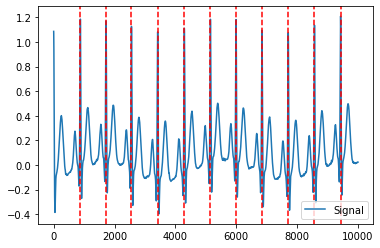

In [18]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

signals, info = nk.ecg_peaks(ecg, correct_artifacts=True)

nk.events_plot(info["ECG_R_Peaks"], ecg)

### Example 2: Compare different methods

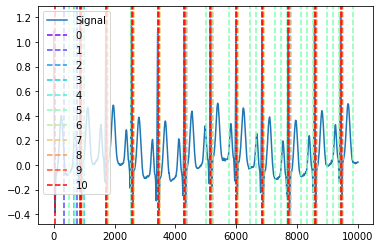

In [19]:
# neurokit (default)
cleaned = nk.ecg_clean(ecg, method="neurokit")

_, neurokit = nk.ecg_peaks(cleaned, method="neurokit")

# pantompkins1985
cleaned = nk.ecg_clean(ecg, method="pantompkins1985")

_, pantompkins1985 = nk.ecg_peaks(cleaned, method="pantompkins1985")

# nabian2018
_, nabian2018 = nk.ecg_peaks(ecg, method="nabian2018")

# hamilton2002
cleaned = nk.ecg_clean(ecg, method="hamilton2002")

_, hamilton2002 = nk.ecg_peaks(cleaned, method="hamilton2002")

# martinez2004
_, martinez2004 = nk.ecg_peaks(ecg, method="martinez2004")

# zong2003
_, zong2003 = nk.ecg_peaks(ecg, method="zong2003")

# christov2004
_, christov2004 = nk.ecg_peaks(cleaned, method="christov2004")

# gamboa2008
cleaned = nk.ecg_clean(ecg, method="gamboa2008")

_, gamboa2008 = nk.ecg_peaks(cleaned, method="gamboa2008")

# elgendi2010
cleaned = nk.ecg_clean(ecg, method="elgendi2010")

_, elgendi2010 = nk.ecg_peaks(cleaned, method="elgendi2010")

# engzeemod2012
cleaned = nk.ecg_clean(ecg, method="engzeemod2012")

_, engzeemod2012 = nk.ecg_peaks(cleaned, method="engzeemod2012")

# kalidas2017
cleaned = nk.ecg_clean(ecg, method="kalidas2017")

_, kalidas2017 = nk.ecg_peaks(cleaned, method="kalidas2017")

# rodrigues2021
_, rodrigues2021 = nk.ecg_peaks(ecg, method="rodrigues2021")

# Collect all R-peak lists by iterating through the result dicts
rpeaks = [
    i["ECG_R_Peaks"]
    for i in [
        neurokit,
        pantompkins1985,
        nabian2018,
        hamilton2002,
        martinez2004,
        christov2004,
        gamboa2008,
        elgendi2010,
        engzeemod2012,
        kalidas2017,
        rodrigues2021,
    ]
]


# Visualize results
nk.events_plot(rpeaks, ecg)

### Example 3: Method-agreement procedure (‘promac’)

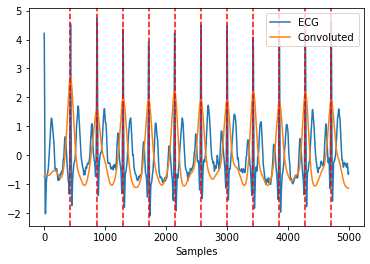

In [20]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=500)

ecg = nk.signal_distort(ecg,
                        sampling_rate=500,
                        noise_amplitude=0.05, noise_frequency=[25, 50],
                        artifacts_amplitude=0.05, artifacts_frequency=50)


info = nk.ecg_findpeaks(ecg, sampling_rate=500, method="promac", show=True)

# ecg_delineate()
ecg_delineate(ecg_cleaned, rpeaks=None, sampling_rate=1000, method='dwt', show=False, show_type='peaks', check=False, **kwargs)

**Delineate QRS complex**

Function to delineate the QRS complex, i.e., the different waves of the cardiac cycles. A typical ECG heartbeat consists of a P wave, a QRS complex and a T wave. The P wave represents the wave of depolarization that spreads from the SA-node throughout the atria. The QRS complex reflects the rapid depolarization of the right and left ventricles. Since the ventricles are the largest part of the heart, in terms of mass, the QRS complex usually has a much larger amplitude than the P-wave. The T wave represents the ventricular repolarization of the ventricles.On rare occasions, a U wave can be seen following the T wave. The U wave is believed to be related to the last remnants of ventricular repolarization.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **rpeaks** (Union[list, np.array, pd.Series]) – The samples at which R-peaks occur. Accessible with the key “ECG_R_Peaks” in the info dictionary returned by ecg_findpeaks().

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (str) – Can be one of "peak" for a peak-based method, "cwt" for continuous wavelet transform or "dwt" (default) for discrete wavelet transform.

* **show** (bool) – If True, will return a plot to visualizing the delineated waves information.

* **show_type** (str) – The type of delineated waves information showed in the plot. Can be "peaks", "bounds_R", "bounds_T", "bounds_P" or "all".

* **check** (bool) – Defaults to False. If True, replaces the delineated features with np.nan if its standardized distance from R-peaks is more than 3.

* ** **kwargs** – Other optional arguments.

**Returns**
* **waves** (dict) – A dictionary containing additional information. For derivative method, the dictionary contains the samples at which P-peaks, Q-peaks, S-peaks, T-peaks, P-onsets and T-offsets occur, accessible with the keys "ECG_P_Peaks", "ECG_Q_Peaks", "ECG_S_Peaks", "ECG_T_Peaks", "ECG_P_Onsets", "ECG_T_Offsets", respectively.

For wavelet methods, in addition to the above information, the dictionary contains the samples at which QRS-onsets and QRS-offsets occur, accessible with the key "ECG_P_Peaks", "ECG_T_Peaks", "ECG_P_Onsets", "ECG_P_Offsets", "ECG_Q_Peaks", "ECG_S_Peaks", "ECG_T_Onsets", "ECG_T_Offsets", "ECG_R_Onsets", "ECG_R_Offsets", respectively.

* **signals** (DataFrame) – A DataFrame of same length as the input signal in which occurrences of peaks, onsets and offsets marked as “1” in a list of zeros.

In [21]:
#step 1:  Delineate
# Simulate ECG signal
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

# Get R-peaks location
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=1000)

# Delineate cardiac cycle
signals, waves = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000)

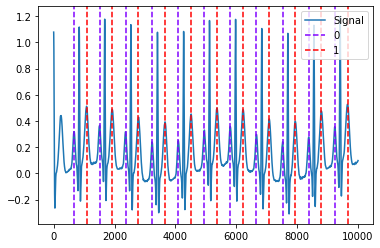

In [22]:
#Step 2. Plot P-Peaks and T-Peaks

nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_T_Peaks"]], ecg)

# ecg_phase()
ecg_phase(ecg_cleaned, rpeaks=None, delineate_info=None, sampling_rate=None)

**Find the Cardiac Phase**

Compute cardiac phase (for both atrial and ventricular), labelled as 1 for systole and 0 for diastole.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **rpeaks** (list or array or DataFrame or Series or dict) – The samples at which the different ECG peaks occur. If a dict or a DataFrame is passed, it is assumed that these containers were obtained with ecg_findpeaks() or ecg_peaks().

* **delineate_info** (dict) – A dictionary containing additional information of ecg delineation and can be obtained with ecg_delineate().

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to None.

**Returns**
* **signals** (DataFrame) – A DataFrame of same length as ecg_signal containing the following columns:

    * **"ECG_Phase_Atrial"**: cardiac phase, marked by “1” for systole and “0” for diastole.

    * **"ECG_Phase_Completion_Atrial"**: cardiac phase (atrial) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * **"ECG_Phase_Ventricular"**: cardiac phase, marked by “1” for systole and “0” for diastole.

    * **"ECG_Phase_Completion_Ventricular"**: cardiac phase (ventricular) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

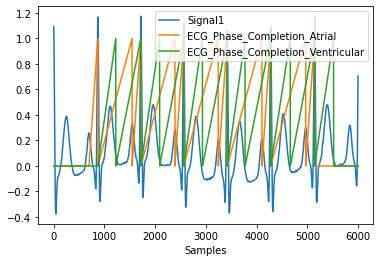

In [23]:
ecg = nk.ecg_simulate(duration=6, sampling_rate=1000)

_, rpeaks = nk.ecg_peaks(ecg)

signals, waves = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000)

cardiac_phase = nk.ecg_phase(ecg_cleaned=ecg, rpeaks=rpeaks,
                             delineate_info=waves, sampling_rate=1000)


nk.signal_plot([ecg, cardiac_phase], standardize=True)

# ecg_rate()
ecg_rate(peaks, sampling_rate=1000, desired_length=None, interpolation_method='monotone_cubic')

**Compute Signal Rate**

Calculate signal rate (per minute) from a series of peaks. It is a general function that works for any series of peaks (i.e., not specific to a particular type of signal). It is computed as 60 / period, where the period is the time between the peaks (see func:.signal_period).



**Parameters**
* **peaks** (Union[list, np.array, pd.DataFrame, pd.Series, dict]) – The samples at which the peaks occur. If an array is passed in, it is assumed that it was obtained with signal_findpeaks(). If a DataFrame is passed in, it is assumed it is of the same length as the input signal in which occurrences of R-peaks are marked as “1”, with such containers obtained with e.g., :func:.`ecg_findpeaks` or rsp_findpeaks().

* **sampling_rate** (int) – The sampling frequency of the signal that contains peaks (in Hz, i.e., samples/second). Defaults to 1000.

* **desired_length** (int) – If left at the default None, the returned rated will have the same number of elements as peaks. If set to a value larger than the sample at which the last peak occurs in the signal (i.e., peaks[-1]), the returned rate will be interpolated between peaks over desired_length samples. To interpolate the rate over the entire duration of the signal, set desired_length to the number of samples in the signal. Cannot be smaller than or equal to the sample at which the last peak occurs in the signal. Defaults to None.

* **interpolation_method** (str) – Method used to interpolate the rate between peaks. See signal_interpolate(). "monotone_cubic" is chosen as the default interpolation method since it ensures monotone interpolation between data points (i.e., it prevents physiologically implausible “overshoots” or “undershoots” in the y-direction). In contrast, the widely used cubic spline interpolation does not ensure monotonicity.

**Returns**
array – A vector containing the rate (peaks per minute).

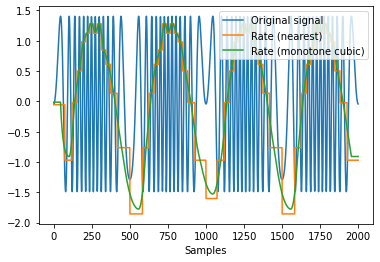

In [24]:
# Create signal of varying frequency
freq = nk.signal_simulate(2, frequency = 1)

signal = np.sin((freq).cumsum() * 0.5)

# Find peaks
info = nk.signal_findpeaks(signal)

# Compute rate using 2 methods
rate1 = nk.signal_rate(peaks=info["Peaks"],
                       desired_length=len(signal),
                       interpolation_method="nearest")


rate2 = nk.signal_rate(peaks=info["Peaks"],
                       desired_length=len(signal),
                       interpolation_method="monotone_cubic")


# Visualize signal and rate on the same scale
nk.signal_plot([signal, rate1, rate2],
               labels = ["Original signal", "Rate (nearest)", "Rate (monotone cubic)"],
               standardize = True)

# ecg_segment()
ecg_segment(ecg_cleaned, rpeaks=None, sampling_rate=1000, show=False)

**Segment an ECG signal into single heartbeats**

Segment an ECG signal into single heartbeats. Convenient for visualizing all the heart beats.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **rpeaks** (dict) – The samples at which the R-peaks occur. Dict returned by ecg_peaks(). Defaults to None.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **show** (bool) – If True, will return a plot of heartbeats. Defaults to False.

**Returns**
dict – A dict containing DataFrames for all segmented heartbeats.

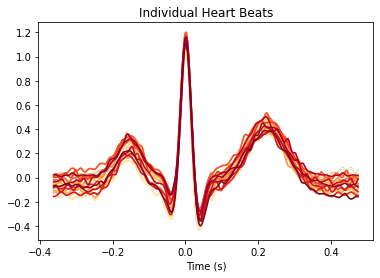

In [25]:
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80, noise = 0.05)

qrs_epochs = nk.ecg_segment(ecg, rpeaks=None, sampling_rate=1000, show=True)

# ecg_eventrelated()
ecg_eventrelated(epochs, silent=False)

**Event-related analysis of ECG**

Performs event-related ECG analysis on epochs containing ECG signals.

**Parameters**
* **epochs** (Union[dict, pd.DataFrame]) – A dict containing one DataFrame per event/trial, usually obtained via epochs_create(), or a DataFrame containing all epochs, usually obtained via epochs_to_df().

* **silent** (bool) – If True, silence possible warnings.

**Returns**
DataFrame – A dataframe containing the analyzed ECG features for each epoch, with each epoch indicated by the Label column (if not present, by the Index column). The analyzed features consist of the following:

* **ECG_Rate_Max**: the maximum heart rate after stimulus onset.

* **ECG_Rate_Min**: the minimum heart rate after stimulus onset.

* **ECG_Rate_Mean**: the mean heart rate after stimulus onset.

* **ECG_Rate_SD**: the standard deviation of the heart rate after stimulus onset.

* **ECG_Rate_Max_Time**: the time at which maximum heart rate occurs.

* **ECG_Rate_Min_Time**: the time at which minimum heart rate occurs.

* **ECG_Phase_Atrial**: indication of whether the onset of the event concurs with respiratory systole (1) or diastole (0).

* **ECG_Phase_Ventricular**: indication of whether the onset of the event concurs with respiratory systole (1) or diastole (0).

* **ECG_Phase_Atrial_Completion**: indication of the stage of the current cardiac (atrial) phase (0 to 1) at the onset of the event.

* **ECG_Phase_Ventricular_Completion**: indication of the stage of the current cardiac (ventricular) phase (0 to 1) at the onset of the event.

We also include the following experimental features related to the parameters of a quadratic model:

* **ECG_Rate_Trend_Linear**: The parameter corresponding to the linear trend.

* **ECG_Rate_Trend_Quadratic**: The parameter corresponding to the curvature.

* **ECG_Rate_Trend_R2**: the quality of the quadratic model. If too low, the parameters might not be reliable or meaningful.

### Example 1: Simulated Data

In [26]:
# Simulate ECG signal
signal = nk.ecg_simulate(duration=20)

# Preprocess
ecg, info = nk.ecg_process(signal)

# Create epochs
epochs = nk.epochs_create(ecg, events=[5000, 10000, 15000],
                          epochs_start=-0.1, epochs_end=1.9)


nk.ecg_eventrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,5000,70.820821,-0.000660,-1.295907,-0.827714,0.421653,0.001051,1.821961,-1.461422,0.107291,0.995942,1.0,0.426901,0.0,0.797938,0.989182
2,2,10000,68.972140,2.447388,0.000732,1.329483,0.828371,1.900000,0.001051,2.021927,-0.258071,0.986829,0.0,0.838897,0.0,0.414634,0.947173
3,3,15000,71.080290,0.518755,-2.253397,-0.310548,0.822848,0.391246,1.900000,1.172407,0.171869,0.995553,0.0,0.671171,0.0,0.189189,0.944272


### Example 2: Real Data

In [27]:
# Download real dataset
data = nk.data("bio_eventrelated_100hz")

# Process the data
df, info = nk.bio_process(ecg=data["ECG"], sampling_rate=100)

events = nk.events_find(data["Photosensor"],
                        threshold_keep='below',
                        event_conditions=["Negative", "Neutral",
                                          "Neutral", "Negative"])


epochs = nk.epochs_create(df, events, sampling_rate=100,
                          epochs_start=-0.1, epochs_end=1.9)


nk.ecg_eventrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,Negative,1024,58.962843,-0.034935,-3.875928,-2.279443,1.114000,0.010553,1.900000,-2.861522,-0.080625,0.999367,0.0,0.144578,1.0,0.400000,0.978231
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.690421,1.654065,0.010553,1.327136,-6.800245,0.283399,0.993256,0.0,0.880000,0.0,0.553846,0.912938
3,3,Neutral,9224,55.976284,4.674856,-1.922230,-0.282846,1.813644,1.900000,1.075879,-7.826192,0.941835,0.956162,0.0,0.044944,1.0,0.133333,0.919330
4,4,Negative,12984,57.505912,-0.010599,-3.800491,-1.378359,1.002110,0.010553,1.900000,-0.248683,-0.171035,0.990209,0.0,0.879518,0.0,0.575342,0.789760


# ecg_intervalrelated()
ecg_intervalrelated(data, sampling_rate=1000)

**Interval-related analysis of ECG**

Performs ECG analysis on longer periods of data (typically > 10 seconds), such as resting-state data.

**Parameters**
* **data** (Union[dict, pd.DataFrame]) – A DataFrame containing the different processed signal(s) as different columns, typically generated by ecg_process() or bio_process(). Can also take a dict containing sets of separately processed DataFrames.

* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second). Defaults to 1000Hz.

**Returns**
DataFrame – A dataframe containing the analyzed ECG features. The analyzed features consist of the following:

* **ECG_Rate_Mean**: the mean heart rate.

* **ECG_HRV**: the different heart rate variability metrices.

See hrv_summary() docstrings for details.

In [31]:
# Download data
data = nk.data("bio_resting_5min_100hz")

# Process the data
df, info = nk.ecg_process(data["ECG"], sampling_rate=100)

# Single dataframe is passed
nk.ecg_intervalrelated(df, sampling_rate=100)



,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,694.756381,49.036043,7.277185,48.83361,NaN,NaN,NaN,NaN,38.837766,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.832294,1.846507,2.722348,0.873124


In [32]:
epochs = nk.epochs_create(df, events=[0, 15000], sampling_rate=100, epochs_end=150)

nk.ecg_intervalrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
1,1,86.389814,69.497674,5.167181,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252763,4.290505,1.166763,1.323430,1.334030,1.573050,1.653578,1.803504,2.33683,0.828876
2,2,86.394396,69.460465,4.648090,NaN,NaN,NaN,NaN,NaN,NaN,...,1.881786,4.080222,1.347346,1.737149,1.497679,1.957806,1.536938,1.895279,3.09411,0.973029


# ecg_findpeaks()
ecg_findpeaks(ecg_cleaned, sampling_rate=1000, method='neurokit', show=False, **kwargs)

**Locate R-peaks**

Low-level function used by ecg_peaks() to identify R-peaks in an ECG signal using a different set of algorithms. Use the main function and see its documentation for details.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – See ecg_peaks().

* **sampling_rate** (int) – See ecg_peaks().

* **method** (string) – See ecg_peaks().

* **show** (bool) – If True, will return a plot to visualizing the thresholds used in the algorithm. Useful for debugging.

* ** **kwargs** – Additional keyword arguments, usually specific for each method.

**Returns**
info (dict) – A dictionary containing additional information, in this case the samples at which R-peaks occur, accessible with the key "ECG_R_Peaks".

# ecg_invert()
ecg_invert(ecg_signal, sampling_rate=1000, force=False, show=False)

**ECG signal inversion**

Checks whether an ECG signal is inverted, and if so, corrects for this inversion. To automatically detect the inversion, the ECG signal is cleaned, the mean is subtracted, and with a rolling window of 2 seconds, the original value corresponding to the maximum of the squared signal is taken. If the median of these values is negative, it is assumed that the signal is inverted.

**Parameters**
* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **force** (bool) – Whether to force inversion of the signal regardless of whether it is detected as inverted. The default is False.

* **show** (bool) – Shows a plot of the original and inverted signal.

**Returns**
array – Vector containing the corrected ECG signal.

bool – Whether the inversion was performed.

# Interval-related Analysis


This example shows how to use NeuroKit to analyze longer periods of data (i.e., greater than 10 seconds) such as resting state data. 

In [39]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

The Dataset

First, download the dataset located on the GitHub repository.

It contains 5 minutes of physiological signals recorded at a frequency of 100Hz (5 x 60 x 100 = 30000 data points).

It contains the following signals : ECG, PPG, RSP


In [40]:
# Get data
data = nk.data("bio_resting_5min_100hz")

This is the resting state data from 1 participant who was asked to close his/her eyes for 8 minutes, trying not to think of anything as well as not to fall asleep.

# Process the Signals

In this analysis here, we will focus on extracting ECG and RSP features. To process the respective physiological signals, you can use ecg_process() and rsp_process(). You can then then visualize these signals using ecg_plot() and rsp_plot(). For the purposes of these example, we will select just 3000 datapoints (or 30s) to visualize.

Note: Do remember to specify the correct sampling_rate (in this case, to 100Hz) in which the signals were generated, in all the relevant functions.

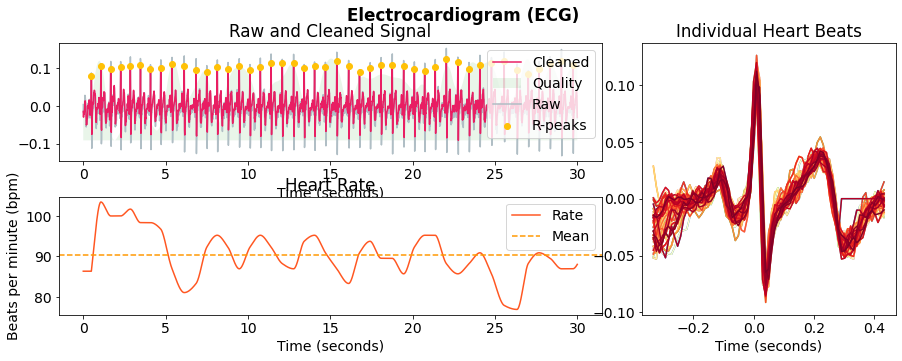

In [41]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)

nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

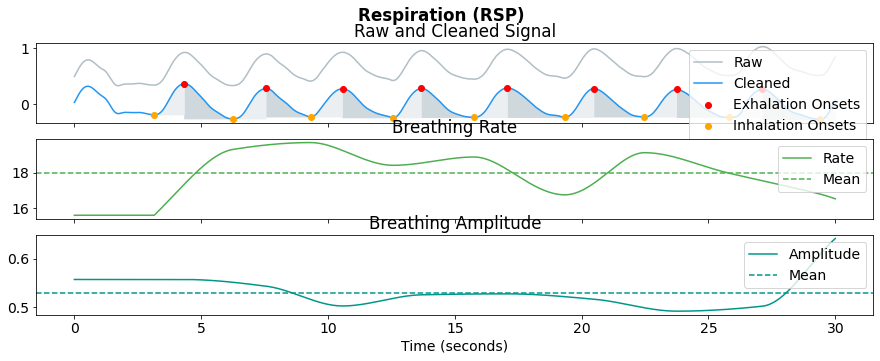

In [42]:
# Process rsp
rsp_signals, info = nk.rsp_process(data["RSP"], sampling_rate=100)

nk.rsp_plot(rsp_signals[:3000], sampling_rate=100)

# Extract Features

Now that we have the processed signals, we can now perform the analysis using ecg_intervalrelated() and rsp_intervalrelated(). Simply provide the processed dataframe and these functions will return a dataframe of the features pertaining to the specific signal.

These features will be quite different from event-related features (See Event-related analysis example) as these signals were generated over a longer period of time. Hence, apart from the mean signal rate, variability metrices pertaining to heart rate variability (HRV) and respiratory rate variability (RRV) are also extracted here.

In [43]:
nk.ecg_intervalrelated(ecg_signals)


,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,69.475638,4.903604,NaN,NaN,NaN,NaN,NaN,NaN,3.883777,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.562676,1.846507,2.722348,0.873124


In [44]:
nk.rsp_intervalrelated(rsp_signals)


,RSP_Rate_Mean,RSP_Amplitude_Mean,RSP_Phase_Duration_Inspiration,RSP_Phase_Duration_Expiration,RSP_Phase_Duration_Ratio,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,...,RRV_SampEn,RRV_DFA_alpha2,RRV_MFDFA_alpha2_Width,RRV_MFDFA_alpha2_Peak,RRV_MFDFA_alpha2_Mean,RRV_MFDFA_alpha2_Max,RRV_MFDFA_alpha2_Delta,RRV_MFDFA_alpha2_Asymmetry,RRV_MFDFA_alpha2_Fluctuation,RRV_MFDFA_alpha2_Increment
0,15.860331,0.399077,0.152429,0.229395,0.664482,134.651105,384.039474,102.06409,135.551343,0.265765,...,1.181133,0.640757,1.363461,0.865082,0.935103,-0.257694,-0.281358,-0.448644,0.000188,0.093669


# Optional: Segmenting the Data

If you want to segment your data for analysis, such as analyzing two separate portions of your resting state data, you can simply do so by splitting the ecg_signals dataframe into epochs using epochs_create(). Using this example dataset, let’s say you want to analyze the first half and the second half of the ECG data. This means that each halved data would last for 60 x 2.5s = 150s.

In this function, we would also specify the onset of events to be at the 0th (for the first half of the data) and the 15000th datapoint (for the second half of the data), since there are 30000 data points in total.

In [45]:
# Half the data
epochs = nk.epochs_create(ecg_signals, 
                          events=[0, 15000], 
                          sampling_rate=100, 
                          epochs_start=0, 
                          epochs_end=150)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


This returns a dictionary of 2 processed ECG dataframes, which you can then enter into ecg_intervalrelated().

In [46]:
# Analyze
nk.ecg_intervalrelated(epochs)

,Label,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
1,1,86.389814,69.497674,5.167181,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252763,4.290505,1.166763,1.323430,1.334030,1.573050,1.653578,1.803504,2.33683,0.828876
2,2,86.394396,69.460465,4.648090,NaN,NaN,NaN,NaN,NaN,NaN,...,1.881786,4.080222,1.347346,1.737149,1.497679,1.957806,1.536938,1.895279,3.09411,0.973029


This then returns a dataframe of the analyzed features, with the rows representing the respective segmented signals. Try doing this with your own signals!

# Event-related Analysis



This example shows how to use NeuroKit to extract epochs from data based on events localisation and its corresponding physiological signals. That way, you can compare experimental conditions with one another.

link: https://neuropsychology.github.io/NeuroKit/examples/bio_eventrelated/bio_eventrelated.html

## The Dataset

Use the nk.data() function to load the dataset located on NeuroKit data folder.

It contains 2.5 minutes of biosignals recorded at a frequency of 100Hz (2.5 x 60 x 100 = 15000 data points).

Biosignals : ECG, RSP, EDA + Photosensor (event signal)



In [48]:
# Download data
data = nk.data("bio_eventrelated_100hz")

This is the data from one participant that saw 4 emotional and neutral images from the IAPS), which we will refer to as events.

Importantly, the images were marked in the recording system (the “triggers”) by a small black rectangle on the screen, which led to the photosensor signal to go down (and then up again after the image). This is what will allow us to retrieve the location of these events.

They were 2 types of images (the condition) that were shown to the participant: “Negative” vs. “Neutral” (in terms of emotion). Each picture was presented for 3 seconds. The following list is the condition order.

In [49]:
condition_list = ["Negative", "Neutral", "Neutral", "Negative"]


# Find Events
These events can be localized and extracted using events_find().

Note that you should also specify whether to select events that are higher or below the threshold using the threshold_keep argument.

In [51]:
# Find events
events = nk.events_find(data["Photosensor"], threshold_keep='below', event_conditions=condition_list)
events

{'onset': array([ 1024,  4957,  9224, 12984]),
 'duration': array([300, 300, 300, 300]),
 'label': array(['1', '2', '3', '4'], dtype='<U11'),
 'condition': ['Negative', 'Neutral', 'Neutral', 'Negative']}

As we can see, events_find() returns a dict containing onsets and durations for each corresponding event, based on the label for event identifiers and each event condition. Each event here lasts for 300 data points (equivalent to 3 seconds sampled at 100Hz).

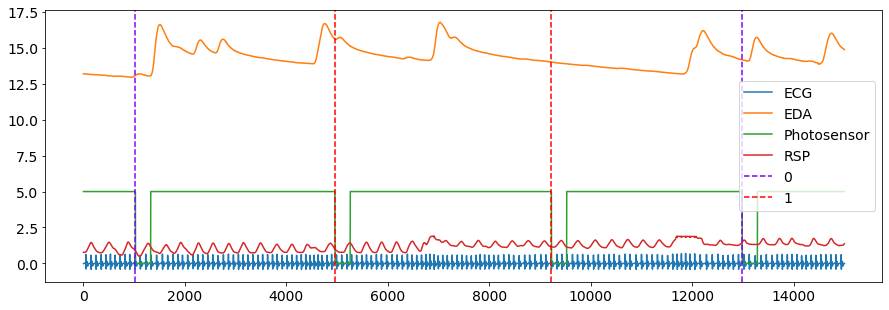

In [52]:
# Plot the location of event with the signals
plot = nk.events_plot(events, data)

The output of events_plot() shows the corresponding events in the signal, with the blue dashed line representing a Negative event and red dashed line representing a Neutral event.

# Process the Signals
Now that we have the events location, we can go ahead and process the data.

Biosignals processing can be done quite easily using NeuroKit with the bio_process() function. Simply provide the appropriate biosignal channels and additional channels that you want to keep (for example, the photosensor), and bio_process() will take care of the rest. It will return a dataframe containing processed signals and a dictionary containing useful information.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

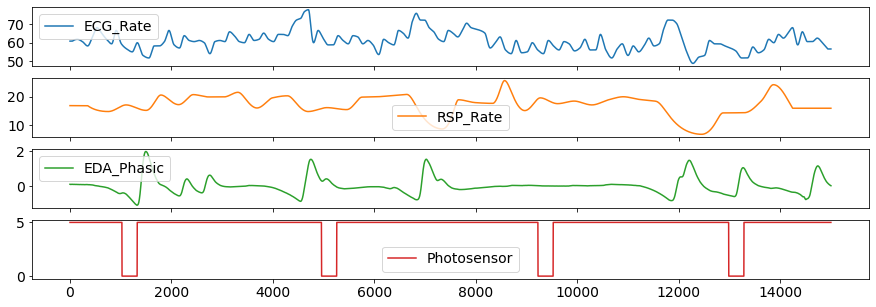

In [53]:
# Process the signal
data_clean, info = nk.bio_process(ecg=data["ECG"], 
                                  rsp=data["RSP"], 
                                  eda=data["EDA"], 
                                  keep=data["Photosensor"], 
                                  sampling_rate=100)

# Visualize some of the channels
data_clean[["ECG_Rate", "RSP_Rate", "EDA_Phasic", "Photosensor"]].plot(subplots=True)

# Create Epochs
We now have to transform this dataframe into epochs, i.e. segments (chunks) of data around the events using epochs_create(). We want it to start 1 second before the event onset and end 6 seconds after. These values are passed into the epochs_start and epochs_end arguments, respectively.

Our epochs will then cover the region from -1 s to +6 s (i.e., 700 data points since the signal is sampled at 100Hz).

In [54]:
# Build and plot epochs
epochs = nk.epochs_create(data_clean, events, sampling_rate=100, epochs_start=-1, epochs_end=6)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Let’s plot some of the signals of the first epoch (and transform them to the same scale for visualization purposes).

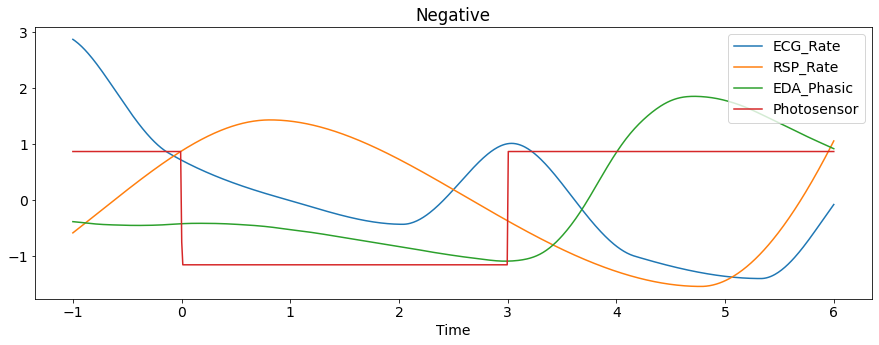

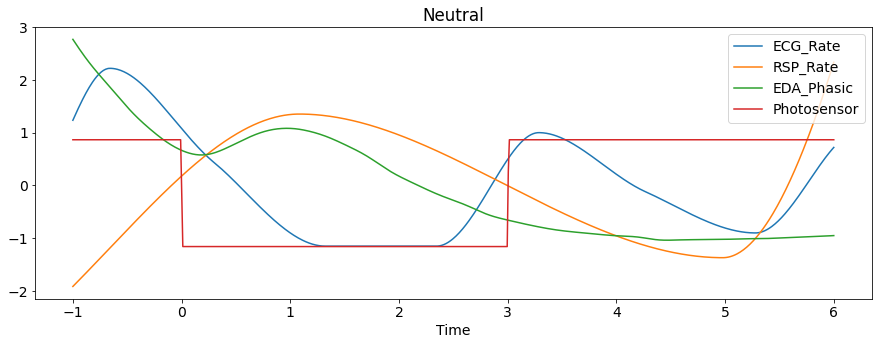

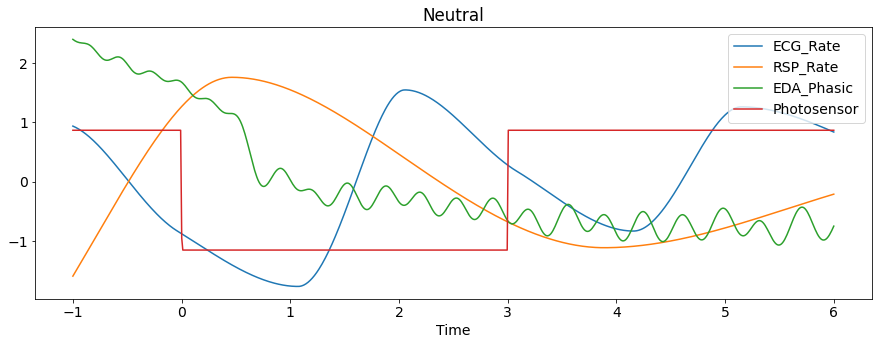

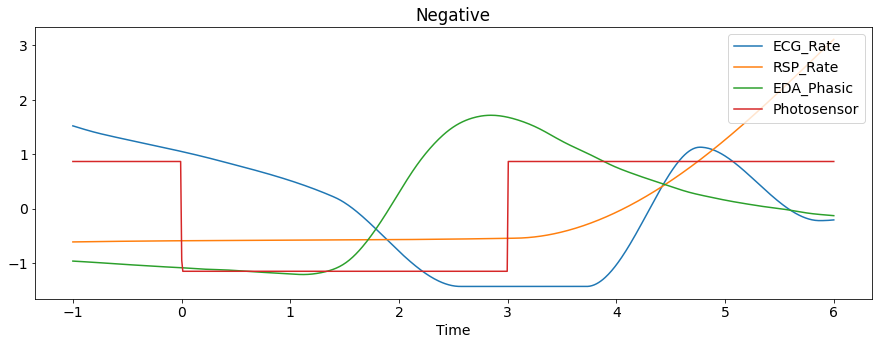

In [55]:
# Iterate through epoch data
for epoch in epochs.values():
    # Plot scaled signals
    nk.signal_plot(epoch[['ECG_Rate', 'RSP_Rate','EDA_Phasic', "Photosensor"]], 
                   title=epoch['Condition'].values[0],  # Extract condition name
                   standardize=True)  

# Manually Extract Event Related Features
With these segments, we are able to compare how the physiological signals vary across the different events. We do this by:

Iterating through our object epochs

Storing the mean value of $X$ feature of each condition in a new dictionary

Saving the results in a readable format

We will call these 3 objects epochs-dictionary, the mean-dictionary and our results-dataframe.

In [56]:
df = {}  # Initialize an empty dict to store the results
         
# Iterate through epochs index and data
for epoch_index, epoch in epochs.items():
    df[epoch_index] = {}  # Initialize an empty dict inside of it
                            

    # Note: We will use the 100th value (corresponding to the event onset, 0s) as the baseline

    # ECG ====
    ecg_baseline = epoch["ECG_Rate"].values[100]  # Baseline
    ecg_mean = epoch["ECG_Rate"][0:4].mean()  # Mean heart rate in the 0-4 seconds
    # Store ECG in df
    df[epoch_index]["ECG_Rate_Mean"] = ecg_mean - ecg_baseline  # Correct for baseline

    # RSP ====
    rsp_baseline = epoch["RSP_Rate"].values[100]  # Baseline
    rsp_rate = epoch["RSP_Rate"][0:6].mean()  # Longer window for RSP that has a slower dynamic
    # Store RSP in df
    df[epoch_index]["RSP_Rate_Mean"] = rsp_rate - rsp_baseline  # Correct for baseline

    
    # EDA/SCR ====
    scr_max = epoch["SCR_Amplitude"][0:6].max()  # Maximum SCR peak
    # If no SCR, consider the magnitude, i.e. that the value is 0
    if np.isnan(scr_max):
        scr_max = 0  
    # Store SCR in df
    df[epoch_index]["SCR_Magnitude"] = scr_max

df = pd.DataFrame.from_dict(df, orient="index")  # Convert to a dataframe
df["Condition"] = condition_list  # Add the conditions
df  # Print DataFrame

,ECG_Rate_Mean,RSP_Rate_Mean,SCR_Magnitude,Condition
1,-2.005527,-0.591449,3.114808,Negative
2,-3.119900,-0.009901,0.000000,Neutral
3,1.336250,-0.899208,0.000000,Neutral
4,-3.543494,0.646818,1.675922,Negative


You can save this dataframe (df.to_csv("results.csv")) and proceed to do some actual statistics on it.

# Automatic Feature Extraction
While manual feature creation allows you to compute and extract exactly what you need, using our automated pipeline is a lot easier.

In [57]:
df = nk.bio_analyze(epochs, sampling_rate=100)
df

,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,...,RSP_Phase,RSP_Phase_Completion,EDA_Peak_Amplitude,EDA_SCR,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time,SCR_RiseTime,SCR_RecoveryTime,RSA_P2T,RSA_Gates
1,1,Negative,1024,58.962843,1.037157,-7.238706,-3.416404,2.462046,3.035765,5.329041,...,0.0,0.641256,1.995617,1,3.114808,4.718169,1.74,NaN,-0.031061,0.000000
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.209327,1.661333,0.011445,1.323319,...,0.0,0.462312,0.868942,0,NaN,NaN,NaN,NaN,-0.030944,-0.083058
3,3,Neutral,9224,55.976284,5.248206,-1.922230,1.891089,2.279224,2.054363,1.072961,...,0.0,0.752747,0.026651,0,NaN,NaN,NaN,NaN,-0.024188,0.132993
4,4,Negative,12984,57.505912,0.186396,-5.781774,-2.941543,2.142268,4.768240,2.565093,...,1.0,0.746667,1.056855,1,1.675922,2.845494,1.73,477.0,-0.020054,0.213656


# Plot Event-Related Features
You can now plot and compare how these features differ according to the event of interest.

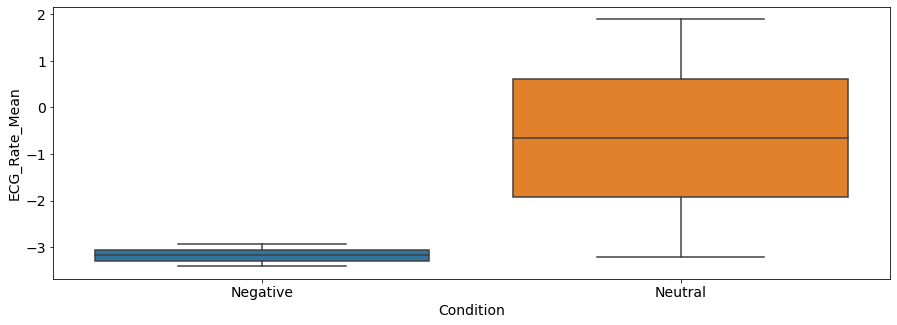

In [58]:
sns.boxplot(x="Condition", y="ECG_Rate_Mean", data=df);


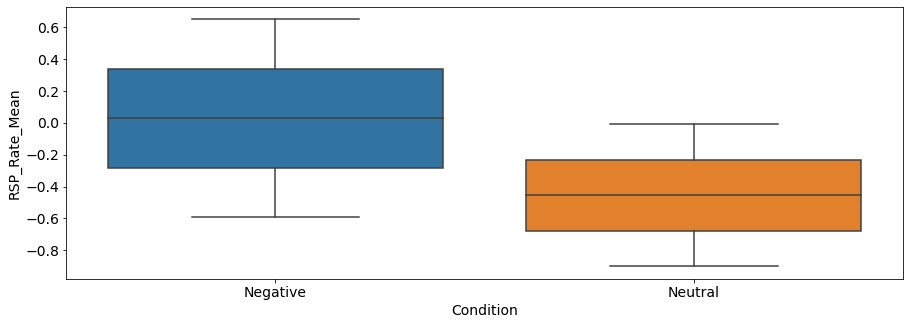

In [59]:
sns.boxplot(x="Condition", y="RSP_Rate_Mean", data=df);

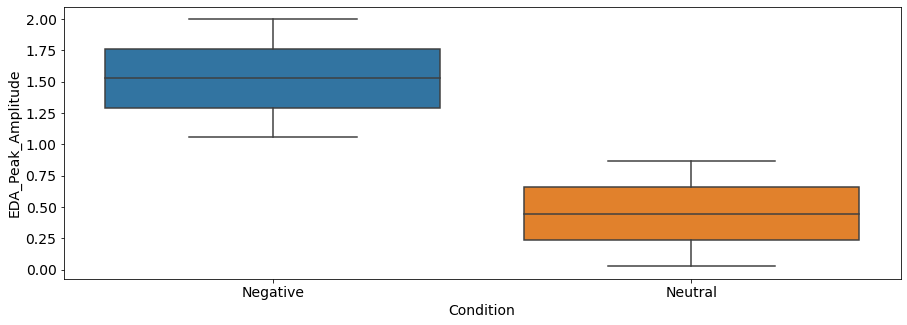

In [60]:
sns.boxplot(x="Condition", y="EDA_Peak_Amplitude", data=df);


 Interpretation: As we can see, there seems to be a difference between the negative and the neutral pictures. Negative stimuli, as compared to neutral stimuli, were related to a stronger cardiac deceleration (i.e., higher heart rate variability), an accelerated breathing rate, and higher SCR magnitude.

Of course, because of data size limits on Github, we had to downsample the signals and have only one participant with a few events. That said, the same workflow can apply for more events, and more participants (you just need to additionally loop through all participants).

In [ ]:
# ecg_heartbeats

# Extract and Visualize Individual Heartbeats

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This example shows how to use NeuroKit to extract and visualize the QRS complexes (individual heartbeats) from an electrocardiogram (ECG).


In [35]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Extract the cleaned ECG signal

In this example, we will use a simulated ECG signal. However, you can use any of your signal (for instance, extracted from the dataframe using the [read_acqknowledge()](https://neuropsychology.github.io/NeuroKit/functions/data.html#read-acqknowledge).


In [26]:
# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)

Once you have a raw ECG signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [ecg_process()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process) to process it.


*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

In [27]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

This function outputs two elements, a *dataframe* containing the different signals (raw, cleaned, etc.) and a *dictionary* containing various additional information (peaks location, ...).

## Extract R-peaks location


The processing function does two important things for our purpose: 1) it cleans the signal and 2) it detects the location of the R-peaks. Let's extract these from the output.


In [28]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

Great. We can visualize the R-peaks location in the signal to make sure it got detected correctly by marking their location in the signal.

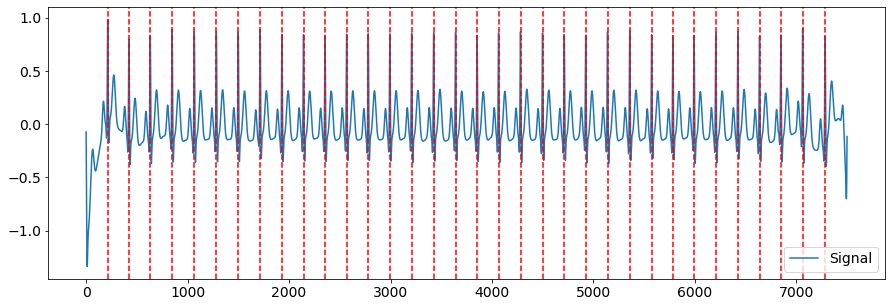

In [29]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)


Once that we know where the R-peaks are located, we can create windows of signal around them (of a length of for instance 1 second, ranging from 400 ms before the R-peak), which we can refer to as *epochs*.


## Segment the signal around the heart beats


You can now epoch all these individual heart beats, synchronized by their R peaks with the [ecg_segment()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-segment) function.


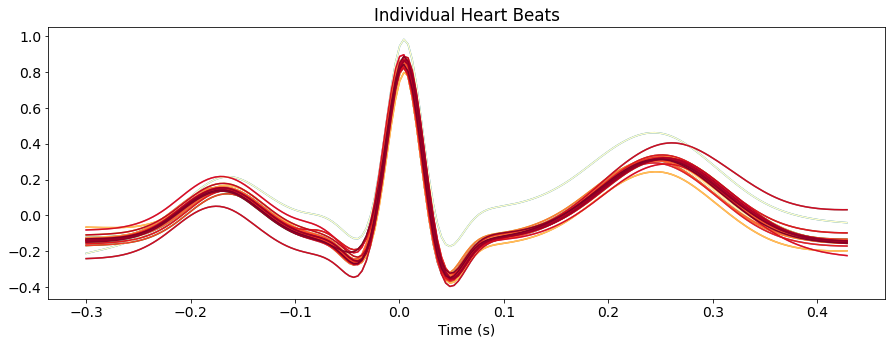

In [30]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)


This create a dictionary of dataframes for each 'epoch' (in this case, each heart beat).
    

## Advanced Plotting

This section is written for a more advanced purpose of plotting and visualizing all the heartbeats segments. The code below uses packages other than *NeuroKit2* to manually set the colour gradient of the signals and to create a more interactive experience for the user - by hovering your cursor over each signal, an annotation of the signal corresponding to the heart beat index is shown.

### Custom colors and legend

Here, we define a function to create the epochs. It takes in `cleaned` as the cleaned signal dataframe, and `peaks` as the array of R-peaks locations.

In [20]:
# Define a function to create epochs
def extract_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, 
                                  events=peaks, 
                                  epochs_start=-0.3, 
                                  epochs_end=0.4, 
                                  sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
    
heartbeats = extract_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

,Signal,Index,Label,Time
0,-0.208551,137,1,-0.300000
1,-0.203352,138,1,-0.295977
2,-0.198121,139,1,-0.291954
3,-0.192803,140,1,-0.287931
4,-0.187326,141,1,-0.283908


We then pivot the dataframe so that each column corresponds to the signal values of one channel, or *Label*.

In [21]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label,1,10,11,12,13,14,15,16,17,18,...,31,32,33,34,4,5,6,7,8,9
Time,,,,,,,,,,,,,,,,,,,,,
-0.300000,-0.208551,-0.140671,-0.136002,-0.131516,-0.139219,-0.137384,-0.136880,-0.131079,-0.136135,-0.151102,...,-0.130606,-0.160349,-0.043917,-0.335574,-0.119478,-0.142621,-0.135635,-0.154164,-0.139989,-0.144426
-0.295977,-0.203352,-0.139898,-0.135130,-0.130562,-0.138068,-0.136738,-0.136289,-0.129969,-0.134923,-0.150204,...,-0.129455,-0.159751,-0.043209,-0.334929,-0.118750,-0.141651,-0.134844,-0.153459,-0.139010,-0.142736
-0.291954,-0.198121,-0.138973,-0.134159,-0.129480,-0.136695,-0.135954,-0.135656,-0.128744,-0.133525,-0.149066,...,-0.128252,-0.159033,-0.042322,-0.334110,-0.117813,-0.140513,-0.133946,-0.152612,-0.137828,-0.140801
-0.287931,-0.192803,-0.137845,-0.133073,-0.128220,-0.135044,-0.134998,-0.134946,-0.127369,-0.131894,-0.147631,...,-0.126956,-0.158161,-0.041228,-0.333076,-0.116634,-0.139174,-0.132920,-0.151574,-0.136366,-0.138565
-0.283908,-0.187326,-0.136455,-0.131844,-0.126724,-0.133049,-0.133837,-0.134109,-0.125800,-0.129975,-0.145817,...,-0.125507,-0.157083,-0.039889,-0.331769,-0.115169,-0.137602,-0.131732,-0.150282,-0.134538,-0.135961


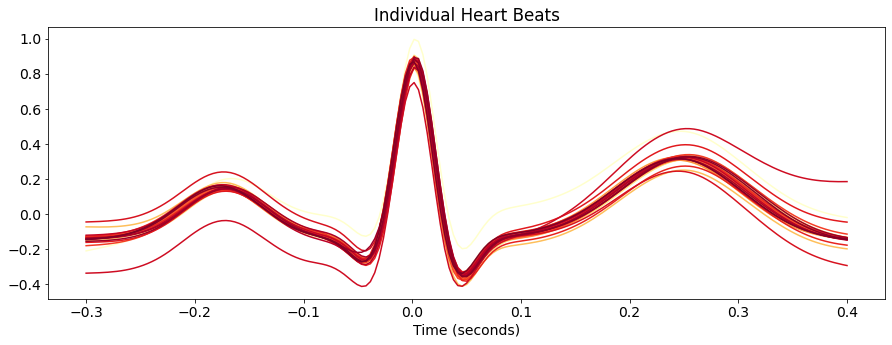

In [22]:
# Prepare figure
fig, ax = plt.subplots()

ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

In [31]:
def get_intervals(A, B, remove_nan=False):
        if remove_nan:
            return [(int(start), int(end)) for start, end in zip(A, B) if not math.isnan(start) and not math.isnan(end)]
        return [(int(start), int(end)) if not math.isnan(start) and not math.isnan(end) else (-1, -1) for start, end in
                zip(A, B)]


def extract(ecg_signal):
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=128, method="neurokit")
    # R-peaks
    # 'pamtompkins1985', 'hamilton2002', 'christov2004', 'gamboa2008', 'elgendi2010', 'engzeemod2012' ,'kalidas2017'
    processed_data, rpeaks, = nk.ecg_peaks(
        ecg_cleaned=ecg_cleaned, sampling_rate=128, method="kalidas2017", correct_artifacts=True
    )
    rpeaks = processed_data[processed_data["ECG_R_Peaks"] == 1].index.values
    # rpeaks = rpeaks["ECG_R_Peaks"]

    rate = nk.signal_rate(rpeaks, sampling_rate=128, desired_length=len(ecg_cleaned))

    processed_data["ECG_Rate"] = rate

    _, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=128, method="dwt", show_type='all')

    p_peaks = np.array(waves_peak["ECG_P_Peaks"])
    p_onset = np.array(waves_peak["ECG_P_Onsets"])
    p_offset = np.array(waves_peak["ECG_P_Offsets"])

    r_onset = np.array(waves_peak["ECG_R_Onsets"])
    r_offset = np.array(waves_peak["ECG_R_Offsets"])

    t_peaks = np.array(waves_peak["ECG_T_Peaks"])
    t_onset = np.array(waves_peak["ECG_T_Onsets"])
    t_offset = np.array(waves_peak["ECG_T_Offsets"])

    segments = {}
    # segments["beat"] = t_offset - p_onset
    # segments["qt"] = t_offset - p_offset
    # segments["tq"] = p_offset[1:] - t_offset[:-1]
    # segments["qrs"] = r_offset - r_onset
    # segments["pr"] = r_onset - p_onset
    # segments["p"] = p_offset - p_onset
    # segments["t"] = t_offset - t_onset
    # segments["st"] = t_offset - r_offset
    # segments["rt"] = t_peaks - rpeaks

    segments["beat"] = t_offset - p_onset
    segments["qtend"] = t_offset - r_onset
    segments["tendq"] = r_onset[1:] - t_offset[:-1]
    segments["qrs"] = r_offset - r_onset
    segments["pr"] = r_onset - p_onset
    segments["p"] = p_offset - p_onset
    segments["t"] = t_offset - t_onset
    segments["st"] = t_onset - r_offset
    segments["qtpico"] = t_peaks - rpeaks
    segments["tpicoq"] = rpeaks[1:] - t_peaks[:-1]

    # ecg_delineate
    # rr_intervals_list contains integer values of RR-interval
    rr_intervals_list = rpeaks[1:] - rpeaks[:-1]
    rr_intervals_list = rr_intervals_list * (1000 / 128)
    segments['rr'] = rr_intervals_list

    # Duration
    for key in segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            segments[key] = segments[key][:-1]

    durations = [np.array(x).reshape(-1, 1) for x in segments.values()]
    durations = np.concatenate(durations, axis=1)
    durations = pd.DataFrame(data=durations, columns=["duration_" + col for col in segments.keys()])

    # peaks
    list_peaks = {"p": p_peaks, 'r': rpeaks, 't': t_peaks}
    list_peaks = {'r': rpeaks, 't': t_peaks}


    for key in list_peaks.keys():
        list_peaks[key] = list_peaks[key][:-1]

    peaks_values = [np.array(x).reshape(-1, 1) for x in list_peaks.values()]
    peaks_values = np.concatenate(peaks_values, axis=1)
    peaks_values = pd.DataFrame(data=peaks_values, columns=["peaks_" + col for col in list_peaks.keys()])
    peaks_values = peaks_values.fillna(0).astype(int)
    peaks_values = peaks_values.applymap(lambda x: ecg_cleaned[int(x)] if x != 0 else np.nan)

    # Amplituds for segments
    p_segments = get_intervals(p_onset, p_offset)
    t_segments = get_intervals(t_onset, t_offset)
    st_segments = get_intervals(r_offset, t_offset)
    qrs_segments = get_intervals(r_onset, r_offset)
    pqrs_segments = get_intervals(p_onset, t_offset)


    list_segments = {"t": t_segments, "p": p_segments, "wt": st_segments, 'qrs': qrs_segments, 'pqrs': pqrs_segments}
    list_segments = {"t": t_segments, 'qrs': qrs_segments}

    segments_extraction = []
    for key in list_segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            list_segments[key] = list_segments[key][:-1]

        results = [np.mean(ecg_cleaned[start:end]) if start != -1 else np.nan for start, end in list_segments[key]]
        segments_extraction.append(np.array(results).reshape(-1, 1))
    amplitudes = np.concatenate(segments_extraction, axis=1)
    amplitudes = pd.DataFrame(data=amplitudes, columns=["mean_" + col for col in list_segments.keys()])

    results = pd.concat([amplitudes, durations, peaks_values], axis=1)

    return results

In [33]:
cleaned_ecg.values

array([-0.07273979, -0.19564196, -0.33135259, ..., -0.40889182,
       -0.26853457, -0.11569566])

In [38]:
extract(cleaned_ecg)

,mean_t,mean_qrs,duration_beat,duration_qtend,duration_tendq,duration_qrs,duration_pr,duration_p,duration_t,duration_st,duration_qtpico,duration_tpicoq,duration_rr,peaks_r,peaks_t
0,0.344586,-0.082382,70.0,29.0,182.0,19.0,41.0,49.0,16.0,-6.0,8.0,201.0,1632.8125,-0.223715,0.745956
1,0.353604,-0.048363,71.0,28.0,180.0,17.0,43.0,50.0,17.0,-6.0,9.0,201.0,1640.6250,-0.187441,0.818042
2,0.353653,-0.058009,71.0,30.0,186.0,19.0,41.0,49.0,17.0,-6.0,9.0,206.0,1679.6875,-0.187703,0.824213
3,0.374949,-0.032798,73.0,29.0,190.0,19.0,44.0,52.0,17.0,-7.0,9.0,209.0,1703.1250,-0.206872,0.845470
4,0.374095,-0.066137,74.0,29.0,189.0,18.0,45.0,52.0,17.0,-6.0,10.0,208.0,1703.1250,-0.243972,0.848991
5,0.373065,-0.032208,73.0,28.0,187.0,18.0,45.0,41.0,17.0,-7.0,9.0,207.0,1687.5000,-0.212966,0.841108
6,0.370359,-0.067274,73.0,29.0,165.0,18.0,44.0,41.0,17.0,-6.0,9.0,215.0,1750.0000,-0.200205,0.841261
7,0.122261,0.026287,156.0,134.0,103.0,61.0,22.0,41.0,57.0,16.0,62.0,147.0,1632.8125,0.823580,0.293566
8,0.130724,-0.061279,155.0,111.0,101.0,18.0,44.0,51.0,57.0,36.0,68.0,142.0,1640.6250,-0.004268,0.307466
9,0.352390,-0.044560,72.0,29.0,184.0,19.0,43.0,39.0,17.0,-7.0,9.0,212.0,1726.5625,-0.222059,0.813991


# ECG-Derived Respiration (EDR)

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

ECG-derived respiration (EDR) is the extraction of respiratory information from ECG and is a noninvasive method to monitor respiration activity under instances when respiratory signals are not recorded. In clinical settings, this presents convenience as it allows the monitoring of cardiac and respiratory signals simultaneously from a recorded ECG signal. This example shows how to use NeuroKit to perform EDR analysis.

In [2]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Download ECG Data

In this example, we will download a dataset containing an ECG signal sampled at 1000 Hz.

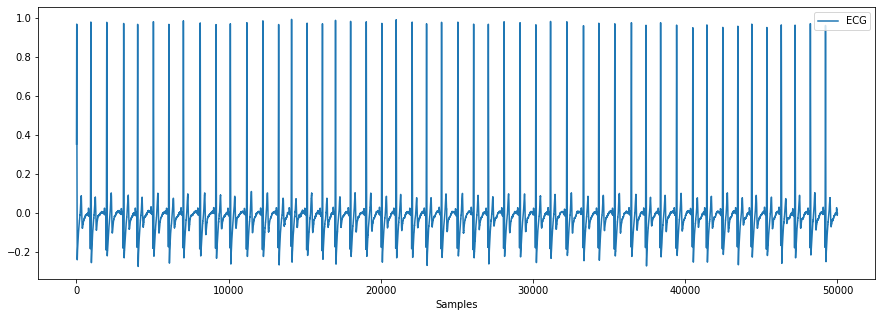

In [4]:
# Get data
ecg = nk.data('ecg_1000hz.csv')

# Visualize signal
nk.signal_plot(ecg) 

## Extraction of ECG Features

Now you can extract the R peaks of the signal using `ecg_peaks()` and compute the heart period using `ecg_rate()`. 

*Note: As the dataset has a frequency of 1000Hz, make sure the `sampling_rate` is also set to 1000Hz. It is critical that you specify the correct sampling rate of your signal throughout all the processing functions.*

In [5]:
# Extract peaks
rpeaks, info = nk.ecg_peaks(ecg, sampling_rate=1000)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg))

## Analyse EDR

Now that we have an array of the heart period, we can then input this into `ecg_rsp()` to extract the EDR.

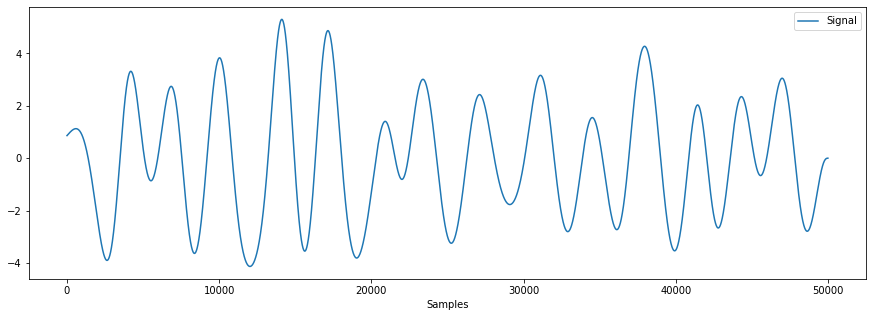

In [6]:
edr = nk.ecg_rsp(ecg_rate, sampling_rate=1000)

# Visual comparison
nk.signal_plot(edr)

The default method used is the one by **Van Gent et al. (2019)**, but the function `ecg_rsp()` incorporates different methods to compute EDR. For a visual comparison of the different methods, we can create a dataframe of EDR columns each of which are produced by different methods, and then plot it, like so:

In [7]:
edr_df = pd.DataFrame({
    "Van Gent et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000),
    "Charlton et al." : nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="charlton2016"),
    "Soni et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="soni2019"),
    "Sarkar et al.": nk.ecg_rsp(ecg_rate, sampling_rate=1000, method="sarkar2015")
    })

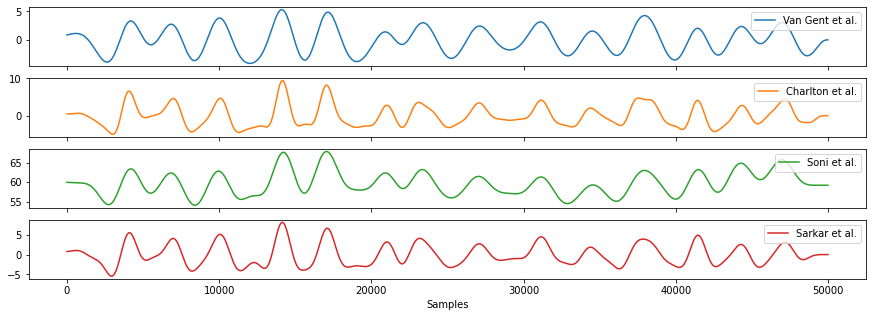

In [8]:
nk.signal_plot(edr_df, subplots=True)

# Locate P, Q, S and T waves in ECG

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This example shows how to use NeuroKit to delineate the ECG peaks in Python using NeuroKit. This means detecting and locating all components of the QRS complex, including **P-peaks** and **T-peaks**, as well their **onsets** and **offsets** from an ECG signal.

In [2]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

In this example, we will use a short segment of ECG signal with sampling rate of 3000 Hz. 

## Find the R peaks

In [17]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)

The [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks) function will return a dictionary contains the samples at which R-peaks are located. 

Let's visualize the R-peaks location in the signal to make sure it got detected correctly.

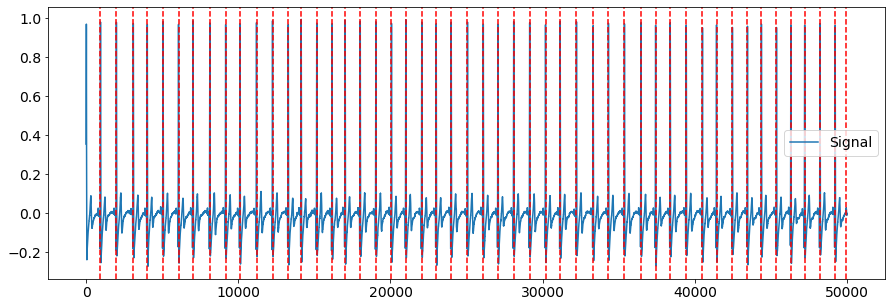

In [18]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

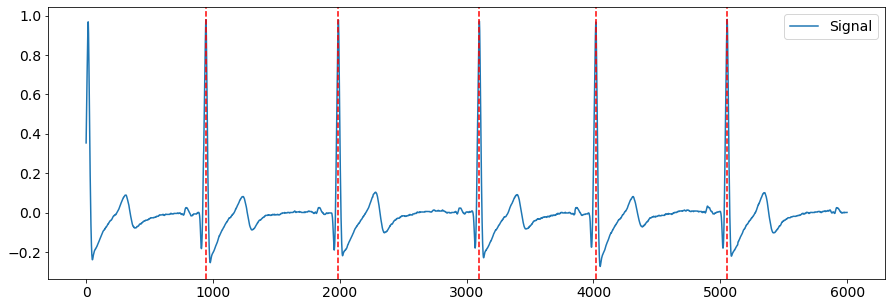

In [20]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6000])

Visually, the R-peaks seem to have been correctly identified. You can also explore searching for R-peaks using different methods provided by NeuroKit [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks).

## Locate other waves (P, Q, S, T) and their onset and offset

In [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate), NeuroKit implements different methods to segment the QRS complexes. There are the derivative method and the other methods that make use of Wavelet to delineate the complexes. 

### Peak method

First, let's take a look at the 'peak' method and its output.

In [21]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="peak")

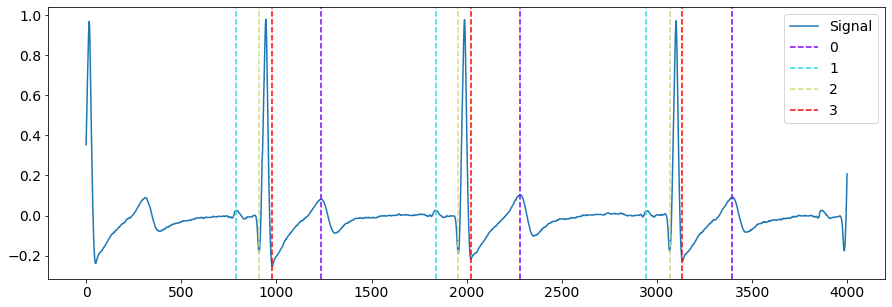

In [25]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4000])


Visually, the 'peak' method seems to have correctly identified the P-peaks, Q-peaks, S-peaks and T-peaks for this signal, at least, for the first few complexes. Well done, *peak*!

However, it can be quite tiring to be zooming in to each complex and inspect them one by one. To have a better overview of all complexes at once, you can make use of the `show` argument in [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate) as below.

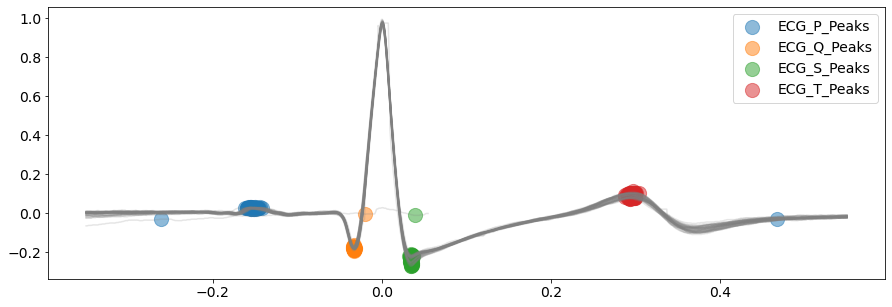

In [26]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

The 'peak' method is doing a glamorous job with identifying all the ECG peaks for this piece of ECG signal.

On top of the above peaks, the peak method also identify the wave boundaries, namely the onset of P-peaks and offset of T-peaks. You can vary the argument `show_type` to specify the information you would like plot.

Let's visualize them below:

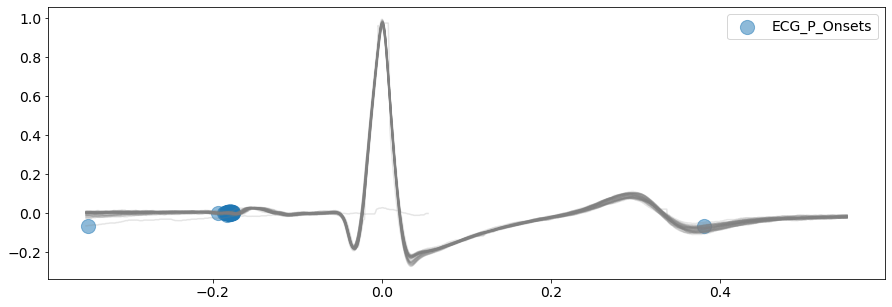

In [27]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000,
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_P')

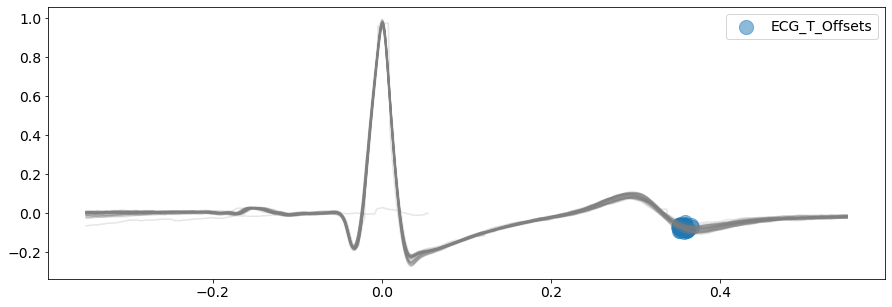

In [29]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000, 
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_T')

Both the onsets of P-peaks and the offsets of T-peaks appears to have been correctly identified here. This information will be used to delineate cardiac phases in [ecg_phase()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-phase).

Let's next take a look at the continuous wavelet method.

### Continuous Wavelet Method (CWT)

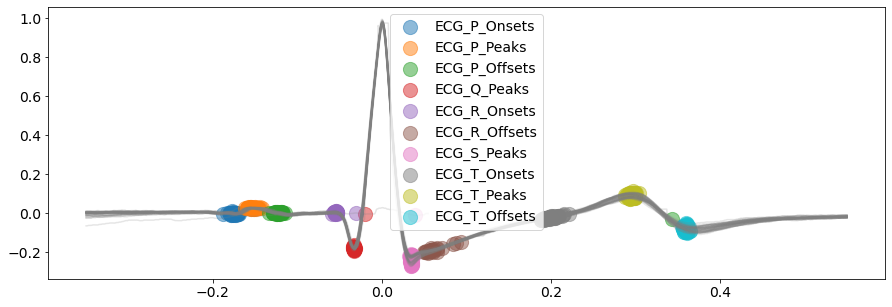

In [30]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='all')

By specifying *'all'* in the `show_type` argument, you can plot all delineated information output by the cwt method. However, it could be hard to evaluate the accuracy of the delineated information with everyhing plotted together. Let's tease them apart!

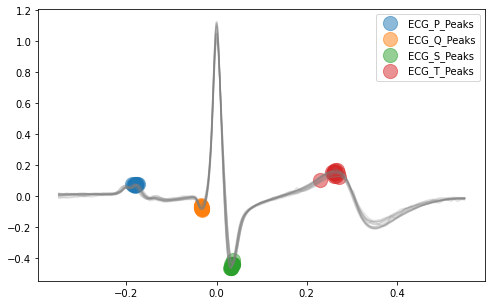

In [14]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='peaks')

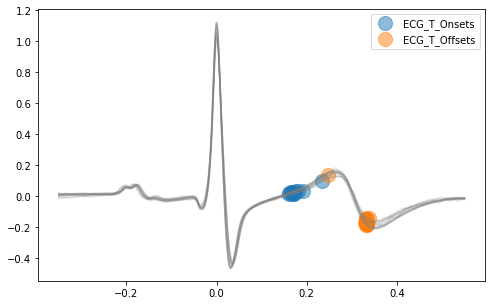

In [15]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_T')

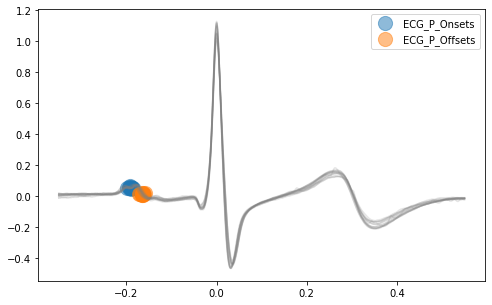

In [16]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_P')

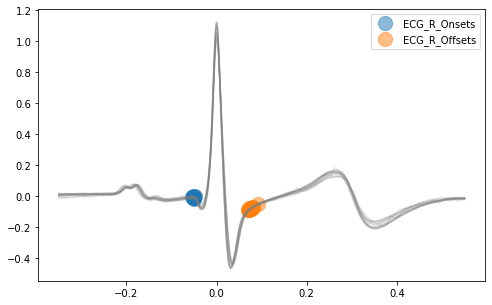

In [17]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_R')

*Unlike the peak method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks. However, it provides more information regarding the boundaries of the waves*

Visually, except a few exception, CWT method is doing a great job. However, the P-waves boundaries are not very clearly identified here.

Last but not least, we will look at the third method in NeuroKit [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate) function: the discrete wavelet method. 

### Discrete Wavelet Method (DWT) - default method

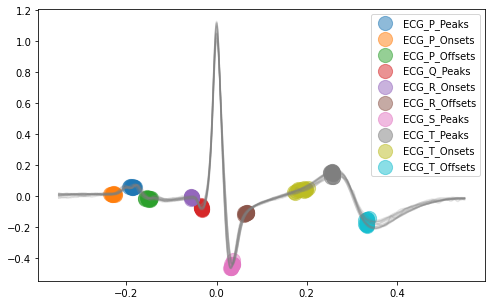

In [18]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

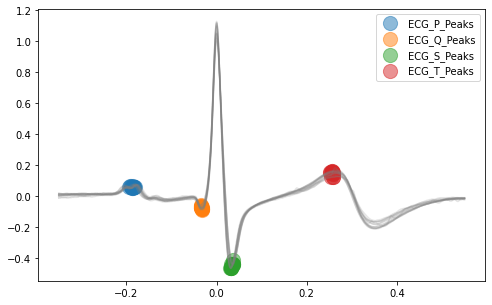

In [19]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

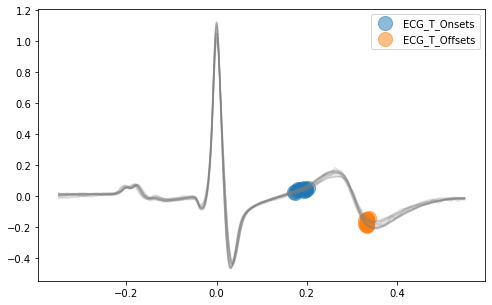

In [20]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_T')

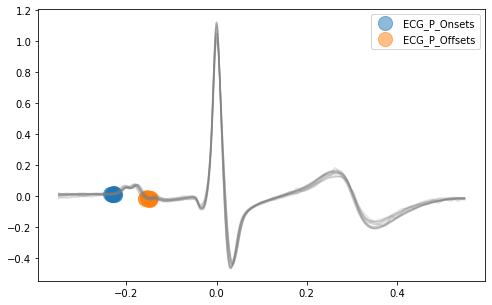

In [21]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_P')

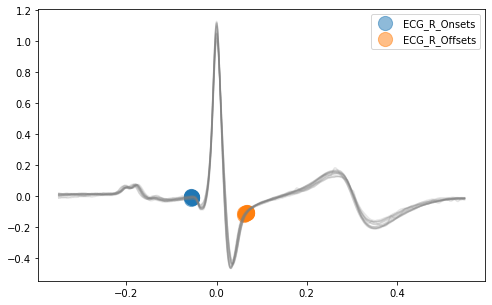

In [22]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_R')

Visually, from the plots above, the delineated outputs of DWT appear to be more accurate than CWT, especially for the P-peaks and P-wave boundaries.

Overall, for this signal, the peak and DWT methods seem to be superior to the CWT.

# Generating Abnormal 12-leads ECG

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

In [3]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Normal Multi-lead ECG

We can generate a normal multi-lead ECG signal with the following code:

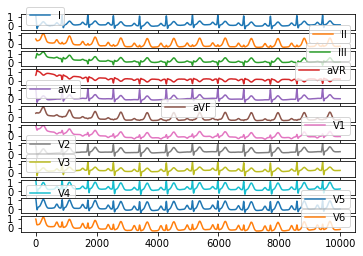

In [1]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize results
ecg12[0:10000].plot(subplots=True);

## Abnormal Multi-lead ECG

Abnormal ECG can be generated by modifying the simulation parameters. We will draw random parameters from a distribution.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

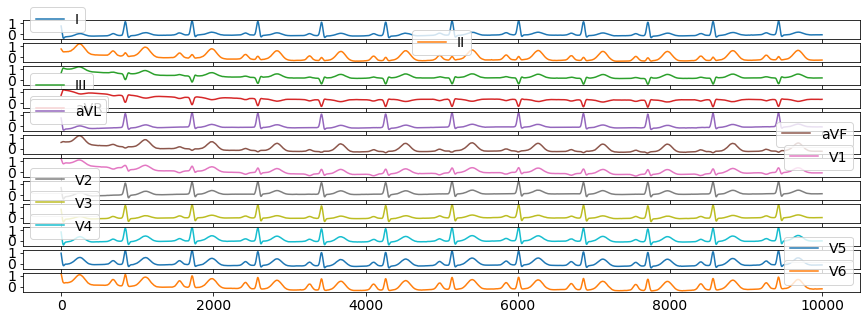

In [12]:
# Normal parameters (used by default)
# ===================================
# t, the starting position along the circle of each interval in radius
ti = np.array((-70, -15, 0, 15, 100))
# a, the amplitude of each spike
ai = np.array((1.2, -5, 30, -7.5, 0.75))
# b, the width of each spike
bi = np.array((0.25, 0.1, 0.1, 0.1, 0.4))

# Add noise
# ===============
ti = np.random.normal(ti, np.ones(5) * 3)
ai = np.random.normal(ai, np.abs(ai / 5))
bi = np.random.normal(bi, np.abs(bi / 5))

ecg12 = nk.ecg_simulate(duration=10, method="multileads", ti=ti, ai=ai, bi=bi)

# Visualize results
ecg12[0:10000].plot(subplots=True);

## Explanation


For a better understanding of the above parameters, please read the following.

![](table.png)

We can see from the above table that each interval in the 3D trajectory can be fixed by 3 parameters:

- `ti`: The starting position $\theta_i/t_i$ along the circle of each interval in radius
- `ai`: The amplitude of each spike a
- `bi`: The width of each wave b. By altering these 3 parameters we can change the shape of the 3D trajectory and thus change the waveform of the resulting ECG.

![](3D.png)

**Prebuilt Synthetic Data**
Prebuilt synthetic data can be found at the following link":
- https://drive.google.com/drive/folders/1iqyAlyHAvNWdOvjEGn8Y6C8kItsdZ_GC?usp=sharing




In [ ]:
# não sei se o HRV e relevante

# Heart Rate Varability (HRV)

NeuroKit2 is the most comprehensive package when it comes to HRV indices, and this example shows how to use NeuroKit2 to compute heart rate variability (HRV) indices in the time-, frequency-, and non-linear domain.

For a comprehensive review of the most up-to-date HRV indices, a discussion of their significance in psychology, and a step-by-step guide for HRV analysis using **NeuroKit2**, the [Heart Rate Variability in Psychology: A Review of HRV Indices and an Analysis Tutorial](https://doi.org/10.3390/s21123998) paper is a good place to start. 

## Compute HRV features

In [2]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Download Dataset

First, let's download the resting rate data (sampled at 100Hz) using `nk.data()`.

In [3]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


You can see that it consists of three different signals, pertaining to ECG, PPG (an alternative determinant of heart rate as compared to ECG), and RSP (respiration). Now, let's extract the ECG signal in the shape of a vector (i.e., a one-dimensional array), and find the peaks using [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks).

In [4]:
# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

This produces two elements, `peaks` which is a DataFrame of same length as the input signal in which occurences of R-peaks are marked with 1 in a list of zeros. `info` is a dictionary of the sample points at which these R-peaks occur. 

HRV is the temporal variation between consecutive heartbeats (**RR intervals**). Here, we will use `peaks` i.e. occurrences of the heartbeat peaks, as the input argument in the following HRV functions to extract the indices. 

## Time-Domain Analysis

First, let's extract the time-domain indices.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,0.089225,0.100084,690.0,44.478,0.064461,60.0,14.651163,49.302326,7.962963,234.375


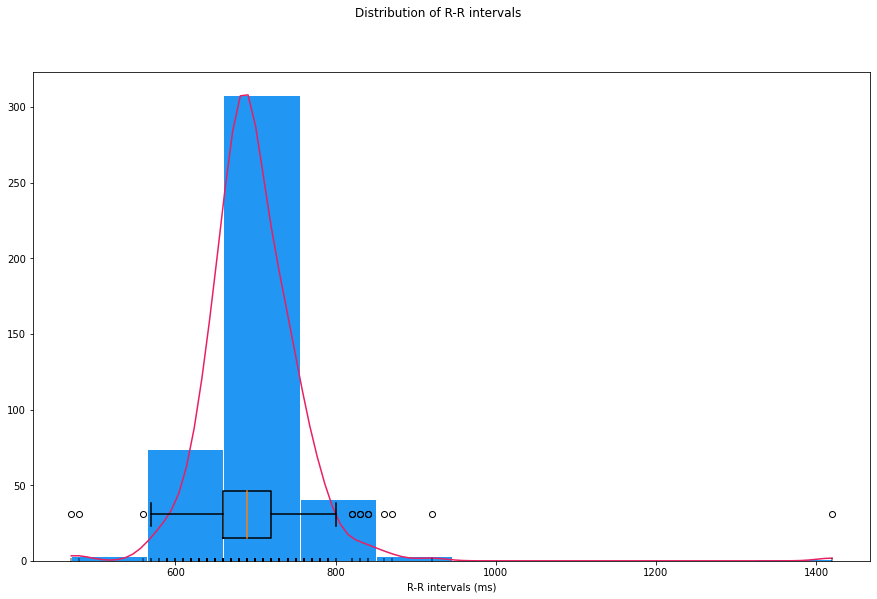

In [5]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) so on and so forth. You can also visualize the distribution of R-R intervals by specifying `show=True` in [hrv_time()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-time).

## Frequency-Domain Analysis

Now, let's extract the frequency domain features, which involve extracting for example the spectral power density pertaining to different frequency bands. Again, you can visualize the power across frequency bands by specifying `show=True` in [hrv_frequency()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-frequency).

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,0.016913,0.050186,0.06632,0.009835,0.75672,0.350328,0.462957,-2.713264


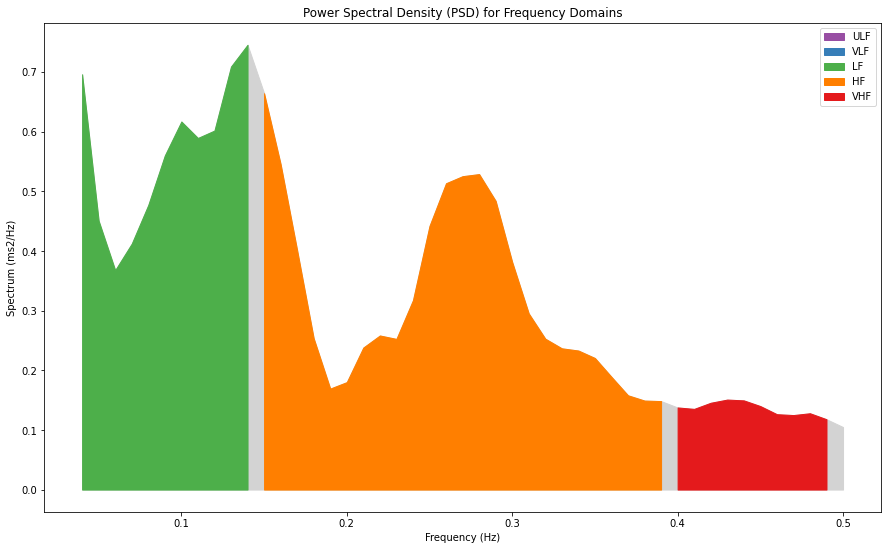

In [9]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True, normalize=True)
hrv_freq

## Non-Linear Domain Analysis

Now, let's compute the non-linear indices with [hrv_nonlinear()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-nonlinear).

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,49.341281,72.597435,0.679656,11253.343336,1.471333,4.758252,427.259889,0.55814,0.511688,0.736041,...,1.259931,4.282683,1.063533,1.166172,1.331672,1.387204,0.712083,1.921677,1.913071,0.854475


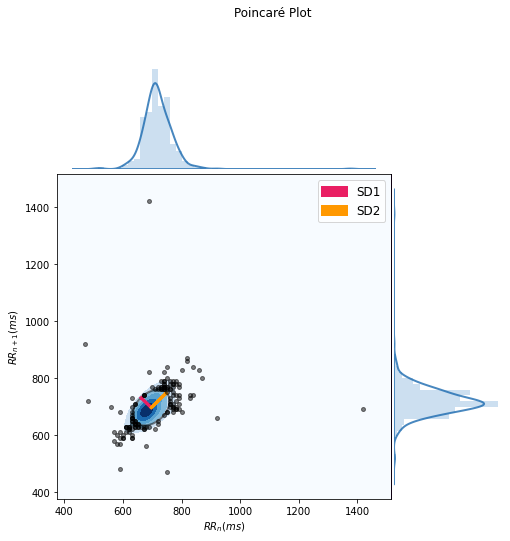

In [7]:
hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=100, show=True)
hrv_nonlinear

This will produce a Poincaré plot which plots each RR interval against the next successive one.

Note that there exist many more [**complexity indices**](https://neuropsychology.github.io/NeuroKit/functions/complexity.html), that are available in NeuroKit2, and that could be applied to HRV. The ``hrv_nonlinear()`` function only includes the most commonly used indices.

## All Domains

Finally, if you'd like to extract HRV indices from all three domains, you can simply input `peaks` into [hrv()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html), where you can specify `show=True` to visualize the combination of plots depicting the RR intervals distribution, power spectral density for frequency domains, and the poincare scattergram.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,1.259931,4.282683,1.063533,1.166172,1.331672,1.387204,0.712083,1.921677,1.913071,0.854475


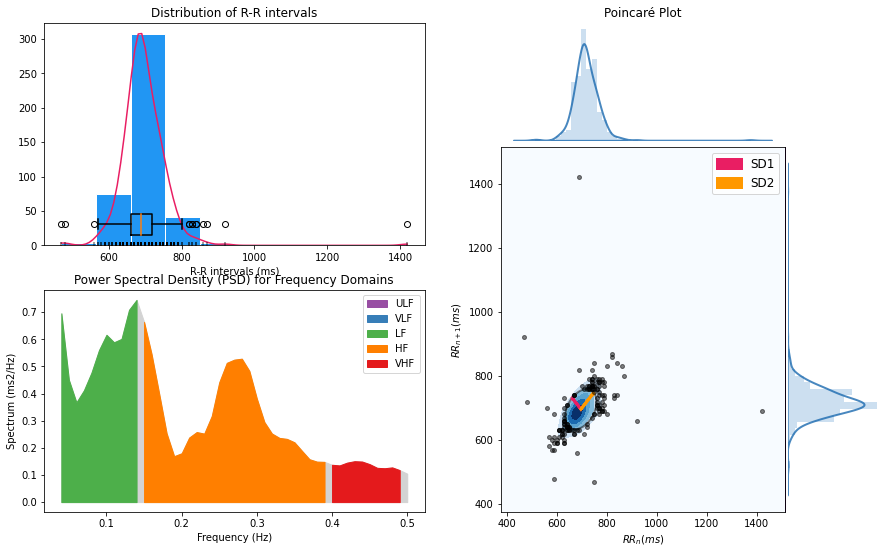

In [8]:
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
hrv_indices

In [ ]:
#pip install tsfel
#pip install wget
#pip install patool

# TSFEL predicting Normal Vs. Pathological knee

To perform this example every cell must be executed. To do so click run ([  ]) in the top left of every cell.

The first step consists of importing TSFEL library. To do so press play. 

The import can take few seconds, but the run button will change so that you know that the import has started and ended.

A warning will appear to reset all runtimes before running, click to accept.

In [91]:
#@title Import Time Series Feature Extraction Library
import warnings
warnings.filterwarnings('ignore')
!pip install tsfel >/dev/null 2>&1
!pip install patool >/dev/null 2>&1
from sys import platform
if platform == "linux" or platform == "linux2":
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00278/SEMG_DB1.rar >/dev/null 2>&1
else:
    !pip install wget >/dev/null 2>&1
    import wget
    wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/00278/SEMG_DB1.rar')

O sistema nÆo pode encontrar o caminho especificado.
O sistema nÆo pode encontrar o caminho especificado.
O sistema nÆo pode encontrar o caminho especificado.


100% [........................................................................] 14440981 / 14440981

In [93]:
# Import libraries
import glob
import itertools
import patoolib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as interp
import tsfel
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Unzip dataset
patoolib.extract_archive("SEMG_DB1.rar") 

patool: Extracting SEMG_DB1.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\Azzy\Desktop\notebook wes\SEMG_DB1.rar"
patool:     with cwd=.\Unpack_s3_6bm33
patool: ... SEMG_DB1.rar extracted to `SEMG_DB1' (multiple files in root).


'SEMG_DB1'

## Auxiliary Methods

**Data pre-processing**

Method to interpolate each file data (EMG and goniometer signals) to the same sample size.

In [94]:
def preprocess(data):
    """Interpolating the EMG and goniometer to the same sample size

      Parameters
      ----------
      data list of pandas DataFrame
        EMG and gonomioter signals for a given activity
      Returns
      -------
        Interpolated data (list of nd-array)

    """
    data = [interp.interp1d(np.arange(len(x[0].dropna())), x[0].dropna(), axis=0, kind='nearest')(np.linspace(0, len(x[0].dropna()) - 1, len(x[0].iloc[:, 0].dropna()))) for x in data]
    return data

## Dataset

The dataset was acquired by Batallón de sanidad (BASAN) in collaboration with the Universidad Militar Nueva Granada – Bogotá. The protocol was performed by 22 male subjects, 11 with different knee abnormalities previously diagnosed by a professional and other 11 without any known knee pathology. The participants were required to perform 3 different exercises: (1) **walk**, (2) **extension of the leg from the sit position** and (3) **flexion of the knee stand up**.

The acquisition process was conducted with 4 electrodes placed on the following muscles (vastus internus, semitendinosus, biceps femoris and rectus femoris) and a goniometer in the knee.

 
**For this example, we will only be using files from the (2) activity and data from rectus femoris muscle and from the goniometer sensor. The classifier will predict if the participant has a normal or pathological knee.**

In [95]:
# @title Loading normal and pathological files from extension of the leg from the sit position
normal_files = glob.glob("*/N_TXT/*.txt")
patholo_files = glob.glob("*/A_TXT/*.txt")

normalfl = [[pd.read_csv(fl, sep='\t', skiprows=7, usecols=(0, 4), header=None).dropna()] for fl in
            normal_files if
            'Npie' in fl]

patholofl = [[pd.read_csv(fl, sep='\t', skiprows=7, usecols=(0, 4), header=None).dropna()] for fl in
             patholo_files if 'Apie' in fl]

In [96]:
# @title Train and test set
# dataset sampling frequency, according to dataset information
fs = 1000
# window size for window splitter method (each window has 1 seconds)
window_size = 1000 

# Interpolating data
normalfl = preprocess(normalfl)
patholofl = preprocess(patholofl)

# Dividing into train and test sets. Splitting signal in windows
# Using 2 normal files and 2 pathological files for test set
x_train = list(itertools.chain(*[tsfel.signal_window_splitter(signal[i], window_size, overlap=0) for signal in
                                 [normalfl, patholofl] for i in range(len(normalfl) - 2)]))

x_test = list(itertools.chain(*[tsfel.signal_window_splitter(signal[i], window_size, overlap=0) for signal in
                                [normalfl, patholofl] for i in [len(normalfl) - 2, len(normalfl) - 1]]))

y_train = np.concatenate(
    (np.repeat(0, np.cumsum([int(len(normalfl[i]) / window_size) for i in range(len(normalfl) - 2)])[-1]),
     np.repeat(1, np.cumsum([int(len(patholofl[i]) / window_size) for i in range(len(patholofl) - 2)])[-1])))

y_test = np.concatenate((np.repeat(0, np.cumsum([int(len(normalfl[i]) / window_size) for i in [len(normalfl) - 2, len(normalfl) - 1]])[-1]),
                         np.repeat(1, np.cumsum([int(len(patholofl[i]) / window_size) for i in [len(patholofl) - 2, len(patholofl) - 1]])[-1])))


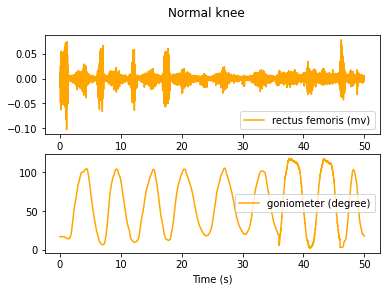

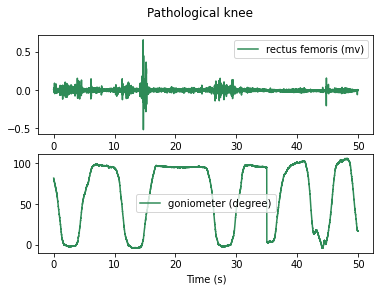

In [97]:
# @title Visualizing signals
nsignal = np.concatenate(x_train[:50])
asignal = np.concatenate(x_train[-50:])
time = np.linspace(0, len(nsignal)* 1/fs, len(nsignal))
c = ['orange', 'seagreen']
title = ['Normal knee', 'Pathological knee']

for i, signal in enumerate([nsignal, asignal]):
    plt.figure(i)
    plt.subplot(211)
    plt.plot(time, signal[:, 0], color=c[i], label='rectus femoris (mv)')
    plt.legend()
    plt.subplot(212)
    plt.plot(time, signal[:, 1], color=c[i], label='goniometer (degree)')
    plt.legend()
    plt.suptitle(title[i])

    plt.xlabel("Time (s)")

# Feature Extraction

In [98]:
# Extract all features' domains (spectral, statistical and temporal)
cfg_file = tsfel.get_features_by_domain()
X_train = tsfel.time_series_features_extractor(cfg_file, x_train, fs=fs, header_names = np.array(['emg', 'gon']))
X_test = tsfel.time_series_features_extractor(cfg_file, x_test, fs=fs, header_names = np.array(['emg', 'gon']))

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


# Feature Selection

After the sensor data is extracted, redundancies and noise should be removed. Thus, minimising the algorithm's error, time and computational complexity. 

In [99]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

# Classification

In this example the classification is performed with a [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier.

In [100]:
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(nX_train, y_train.ravel())

# Predict on test data
y_predict = classifier.predict(nX_test)

condition_labels = ['Normal', 'Pathological']

# Get the classification report
accuracy = accuracy_score(y_test, y_predict) * 100
print(classification_report(y_test, y_predict, target_names = condition_labels))
print("Accuracy: " + str(accuracy) + '%')

              precision    recall  f1-score   support

      Normal       0.95      1.00      0.98        40
Pathological       1.00      0.95      0.97        37

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77

Accuracy: 97.40259740259741%


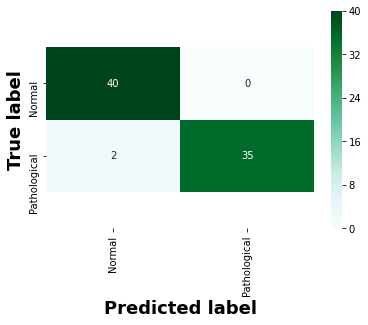

In [101]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=[i for i in condition_labels], columns = [i for i in condition_labels])
plt.figure()
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

All features domains were used in the feature extraction step. Accordingly, the Decision Tree classifier obtained high accuracy and was able to distinguish between normal and pathological knee condition during the extension of the leg from the sit position activity.

# TSFRESH

In [ ]:
pip install tsfresh
# no meu precisei pip install llvmlite --ignore-installed

# Feature Extraction and Selection

This basic example shows how to use [tsfresh](https://tsfresh.readthedocs.io/) to extract useful features from multiple timeseries and use them to improve classification performance.

We use the robot execution failure data set as an example.

In [6]:
%matplotlib inline

import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load and visualize data

The data set documents 88 robot executions (each has a unique `id` between 1 and 88), which is a subset of the [Robot Execution Failures Data Set](https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures). 
For the purpose of simplicity we are only differentiating between successfull and failed executions (`y`).

For each execution 15 force (F) and torque (T) samples are given, which were measured at regular time intervals for the spatial dimensions x, y, and z. 
Therefore each row of the data frame references a specific execution (`id`), a time index (`index`) and documents the respective measurements of 6 sensors (`F_x`, `F_y`, `F_z`, `T_x`, `T_y`, `T_z`).

In [7]:
from tsfresh.examples import robot_execution_failures

robot_execution_failures.download_robot_execution_failures()
df, y = robot_execution_failures.load_robot_execution_failures()
df.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


Let's draw some example executions:

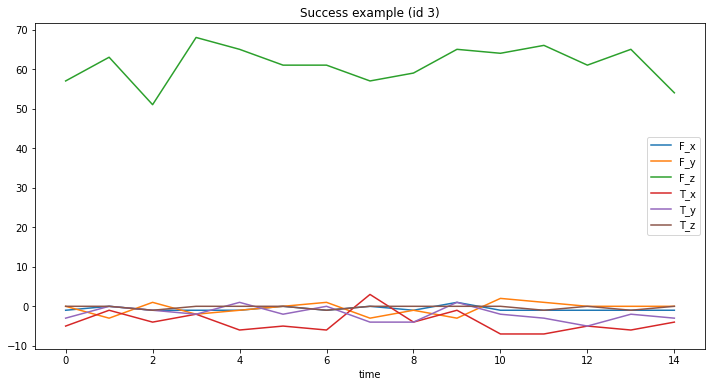

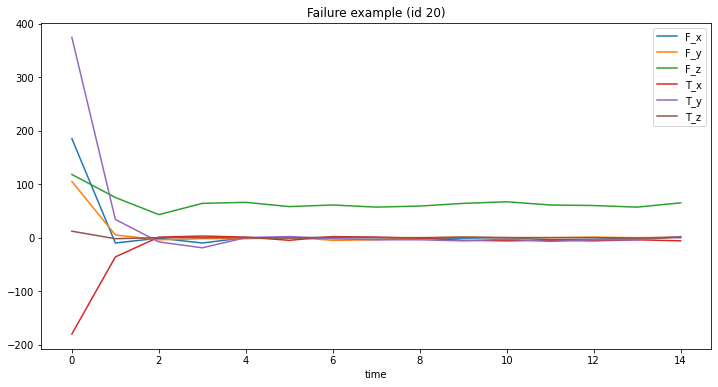

In [8]:
df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

## Extract Features

We can use the data to extract time series features using `tsfresh`.
We want to extract features for each time series, that means for each robot execution (which is our `id`) and for each of the measured sensor values (`F_*` and `T_*`).

You can think of it like this: tsfresh will result in a single row for each `id` and will calculate the features for each columns (we call them "kind") separately.

The `time` column is our sorting column.
For an overview on the data formats of `tsfresh`, please have a look at [the documentation](https://tsfresh.readthedocs.io/en/latest/text/data_formats.html).

In [9]:
# We are very explicit here and specify the `default_fc_parameters`. If you remove this argument,
# the ComprehensiveFCParameters (= all feature calculators) will also be used as default.
# Have a look into the documentation (https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html)
# or one of the other notebooks to learn more about this.
extraction_settings = ComprehensiveFCParameters()

X = extract_features(df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.49s/it]


`X` now contains for each robot execution (= `id`) a single row, with all the features `tsfresh` calculated based on the measured times series values for this `id`.

In [10]:
X.head()

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98",T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.748067,1.831020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.163956,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857143


<div class="alert alert-info">

Currently, 4674 non-NaN features are calculated. 
This number varies with the version of `tsfresh` and with your data.
    
</div>

## Select Features

Using the hypothesis tests implemented in `tsfresh` (see [here](https://tsfresh.readthedocs.io/en/latest/text/feature_filtering.html) for more information) it is now possible to select only the relevant features out of this large dataset.

`tsfresh` will do a hypothesis test for each of the features to check, if it is relevant for your given target.

In [11]:
X_filtered = select_features(X, y)

In [12]:
X_filtered.head()

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-596.000000,-1.0,-1.0,0.0,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-680.384615,-1.0,-1.0,0.0,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-617.000000,-1.0,0.0,0.0,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3426.307692,-1.0,1.0,0.0,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2609.000000,-1.0,0.8,0.0,0.0,0.6


<div class="alert alert-info">

Currently, 669 non-NaN features survive the feature selection given this target.
Again, this number will vary depending on your data, your target and the `tsfresh` version.
    
</div>

## Train and evaluate classifier

Let's train a boosted decision tree on the filtered as well as the full set of extracted features.

In [13]:
X_full_train, X_full_test, y_train, y_test = train_test_split(X, y, test_size=.4)
X_filtered_train, X_filtered_test = X_full_train[X_filtered.columns], X_full_test[X_filtered.columns]

In [14]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_full_test)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        29
        True       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [15]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        29
        True       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Compared to using all features (`classifier_full`), using only the relevant features (`classifier_filtered`) achieves better classification performance with less data.

<div class="alert alert-info">

Please remember that the hypothesis test in `tsfresh` is a statistical test.
You might get better performance with other feature selection methods (e.g. training a classifier with
all but one feature to find its importance) - but in general the feature selection implemented
in `tsfresh` will give you a very reasonable set of selected features.
    
</div>

## Extraction and Filtering is the same as filtered Extraction

Above, we performed the feature extraction and selection independently. 
If you are only interested in the list of selected features, you can run this in one step:

In [16]:
X_filtered_2 = extract_relevant_features(df, y, column_id='id', column_sort='time',
                                         default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


In [17]:
(X_filtered.columns == X_filtered_2.columns).all()

True

# Feature Selection in a sklearn pipeline

This notebook is quite similar to [the first example](./01%20Feature%20Extraction%20and%20Selection.ipynb).
This time however, we use the `sklearn` pipeline API of `tsfresh`.
If you want to learn more, have a look at [the documentation](https://tsfresh.readthedocs.io/en/latest/text/sklearn_transformers.html).

In [18]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from tsfresh.examples import load_robot_execution_failures
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.utilities.dataframe_functions import impute

## Load and Prepare the Data

Check out the first example notebook to learn more about the data and format.

In [19]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
download_robot_execution_failures() 
df_ts, y = load_robot_execution_failures()

We want to use the extracted features to predict for each of the robot executions, if it was a failure or not.
Therefore our basic "entity" is a single robot execution given by a distinct `id`.

A dataframe with these identifiers as index needs to be prepared for the pipeline.

In [20]:
X = pd.DataFrame(index=y.index)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Build the pipeline

We build a sklearn pipeline that consists of a feature extraction step (`RelevantFeatureAugmenter`) with a subsequent `RandomForestClassifier`.

The `RelevantFeatureAugmenter` takes roughly the same arguments as `extract_features` and `select_features` do.

In [21]:
ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier())
      ])

<div class="alert alert-warning">
    
Here comes the tricky part!
    
The input to the pipeline will be our dataframe `X`, which one row per identifier.
It is currently empty.
But which time series data should the `RelevantFeatureAugmenter` to actually extract the features from?

We need to pass the time series data (stored in `df_ts`) to the transformer.
    
</div>

In this case, df_ts contains the time series of both train and test set, if you have different dataframes for 
train and test set, you have to call set_params two times 
(see further below on how to deal with two independent data sets)

In [22]:
ppl.set_params(augmenter__timeseries_container=df_ts);

We are now ready to fit the pipeline

In [23]:
ppl.fit(X_train, y_train)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.30s/it]
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:202: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  RuntimeWarning,


Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id', column_sort='time',
                                          timeseries_container=      id  time  F_x  F_y  F_z  T_x  T_y  T_z
0      1     0   -1   -1   63   -3   -1    0
1      1     1    0    0   62   -3   -1    0
2      1     2   -1   -1   61   -3    0    0
3      1     3   -1   -1   63   -2   -1    0
4      1     4   -1   -1   63   -3   -1    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[1320 rows x 8 columns])),
                ('classifier', RandomForestClassifier())])

The augmenter has used the input time series data to extract time series features for each of the identifiers in the `X_train` and selected only the relevant ones using the passed `y_train` as target.
These features have been added to `X_train` as new columns.
The classifier can now use these features during trainings.

## Prediction

During interference, the augmentor does only extract the relevant features it has found out in the training phase and the classifier predicts the target using these features.

In [24]:
y_pred = ppl.predict(X_test)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.03it/s]


So, finally we inspect the performance:

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



You can also find out, which columns the augmenter has selected

In [26]:
ppl.named_steps["augmenter"].feature_selector.relevant_features

['F_x__value_count__value_-1',
 'T_x__absolute_maximum',
 'F_y__mean_n_absolute_max__number_of_maxima_7',
 'F_x__abs_energy',
 'F_x__root_mean_square',
 'F_y__root_mean_square',
 'F_y__abs_energy',
 'T_y__variance',
 'T_y__standard_deviation',
 'F_y__absolute_maximum',
 'T_y__absolute_maximum',
 'F_x__mean_n_absolute_max__number_of_maxima_7',
 'F_x__fft_coefficient__attr_"abs"__coeff_1',
 'T_y__fft_coefficient__attr_"abs"__coeff_2',
 'F_x__range_count__max_1__min_-1',
 'F_x__absolute_maximum',
 'F_z__standard_deviation',
 'F_z__variance',
 'F_x__partial_autocorrelation__lag_1',
 'T_y__fft_coefficient__attr_"abs"__coeff_1',
 'F_x__autocorrelation__lag_1',
 'F_z__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"',
 'F_x__cid_ce__normalize_True',
 'T_y__mean_n_absolute_max__number_of_maxima_7',
 'T_y__root_mean_square',
 'T_y__abs_energy',
 'T_x__fft_coefficient__attr_"abs"__coeff_2',
 'F_y__variance',
 'F_y__standard_deviation',
 'F_x__standard_deviation',
 'F_x__variance',
 

<div class="alert alert-info">
    
In this example we passed in an empty (except the index) `X_train` or `X_test` into the pipeline.
However, you can also fill the input with other features you have (e.g. features extracted from the metadata)
or even use other pipeline components before.
    
</div>

## Separating the time series data containers

In the example above we passed in a single `df_ts` into the `RelevantFeatureAugmenter`, which was used both for training and predicting.
During training, only the data with the `id`s from `X_train` where extracted and during prediction the rest.

However, it is perfectly fine to call `set_params` twice: once before training and once before prediction. 
This can be handy if you for example dump the trained pipeline to disk and re-use it only later for prediction.
You only need to make sure that the `id`s of the enteties you use during training/prediction are actually present in the passed time series data.

In [27]:
df_ts_train = df_ts[df_ts["id"].isin(y_train.index)]
df_ts_test = df_ts[df_ts["id"].isin(y_test.index)]

In [28]:
ppl.set_params(augmenter__timeseries_container=df_ts_train);
ppl.fit(X_train, y_train);

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.40s/it]
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:202: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  RuntimeWarning,


In [29]:
import pickle
with open("pipeline.pkl", "wb") as f:
    pickle.dump(ppl, f)

Later: load the fitted model and do predictions on new, unseen data

In [30]:
import pickle
with open("pipeline.pkl", "rb") as f:
    ppk = pickle.load(f)

In [31]:
ppl.set_params(augmenter__timeseries_container=df_ts_test);
y_pred = ppl.predict(X_test)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.38it/s]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



# Feature Calculator Settings

By default, all feature calculators are used when you call `extract_features`.
There could be multiple reasons why you do not want that:
* you are only interested on a certain feature (or features)
* you want to save time during extraction
* you have ran the feature selection before and already know, which features are relevant

For more information on these settings, please have a look into [the documentation](http://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html).

In [33]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import settings

import numpy as np
import pandas as pd

## Construct a time series container

For testing, we construct the time series container that includes two sensor time series, "temperature" and "pressure", for two devices "a" and "b".

In [34]:
df = pd.DataFrame({"id": ["a", "a", "b", "b"], "temperature": [1,2,3,1], "pressure": [-1, 2, -1, 7]})
df

,id,temperature,pressure
0,a,1,-1
1,a,2,2
2,b,3,-1
3,b,1,7


## The `default_fc_parameters`

Which features are calculated by `tsfresh` is controlled by a dictionary that contains a mapping from feature calculator names to their parameters. 
This dictionary is called `fc_parameters`. 
It maps feature calculator names (= keys) to parameters (= values). 
Every key in the dictionary will be looked up as a function in `tsfresh.feature_extraction.feature_calculators` and be used to extract features.

`tsfresh` comes with some predefined sets of `fc_parameters` dictionaries:

In [35]:
settings.ComprehensiveFCParameters, settings.EfficientFCParameters, settings.MinimalFCParameters

(tsfresh.feature_extraction.settings.ComprehensiveFCParameters,
 tsfresh.feature_extraction.settings.EfficientFCParameters,
 tsfresh.feature_extraction.settings.MinimalFCParameters)

For example, to only calculate a very minimal set of features:

In [36]:
settings_minimal = settings.MinimalFCParameters() 
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

Each key stands for one of the feature calculators. 
The value are the parameters. If a feature calculator has no parameters, `None` is used as a value (and as these feature calculators are very simple, they all have no parameters).

This dictionary can passed to the extract method, resulting in a few basic time series beeing calculated:

In [37]:
X_tsfresh = extract_features(df, column_id="id", default_fc_parameters=settings_minimal)
X_tsfresh.head()

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


,temperature__sum_values,temperature__median,temperature__mean,temperature__length,temperature__standard_deviation,temperature__variance,temperature__root_mean_square,temperature__maximum,temperature__absolute_maximum,temperature__minimum,pressure__sum_values,pressure__median,pressure__mean,pressure__length,pressure__standard_deviation,pressure__variance,pressure__root_mean_square,pressure__maximum,pressure__absolute_maximum,pressure__minimum
a,3.0,1.5,1.5,2.0,0.5,0.25,1.581139,2.0,2.0,1.0,1.0,0.5,0.5,2.0,1.5,2.25,1.581139,2.0,2.0,-1.0
b,4.0,2.0,2.0,2.0,1.0,1.00,2.236068,3.0,3.0,1.0,6.0,3.0,3.0,2.0,4.0,16.00,5.000000,7.0,7.0,-1.0


By using the settings_minimal as value of the default_fc_parameters parameter, those settings are used for all type of time series. 
In this case, the `settings_minimal` dictionary is used for both "temperature" and "pressure" time series.

Please note how the columns in the resulting dataframe depend both on the settings as well as the kinds of the data.

Now, lets say we want to remove the length feature and prevent it from beeing calculated. We just delete it from the dictionary.

In [38]:
del settings_minimal["length"]
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

Now, if we extract features for this reduced dictionary, the length feature will not be calculated

In [39]:
X_tsfresh = extract_features(df, column_id="id", default_fc_parameters=settings_minimal)
X_tsfresh.head()

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


,temperature__sum_values,temperature__median,temperature__mean,temperature__standard_deviation,temperature__variance,temperature__root_mean_square,temperature__maximum,temperature__absolute_maximum,temperature__minimum,pressure__sum_values,pressure__median,pressure__mean,pressure__standard_deviation,pressure__variance,pressure__root_mean_square,pressure__maximum,pressure__absolute_maximum,pressure__minimum
a,3.0,1.5,1.5,0.5,0.25,1.581139,2.0,2.0,1.0,1.0,0.5,0.5,1.5,2.25,1.581139,2.0,2.0,-1.0
b,4.0,2.0,2.0,1.0,1.00,2.236068,3.0,3.0,1.0,6.0,3.0,3.0,4.0,16.00,5.000000,7.0,7.0,-1.0


## The `kind_to_fc_parameters`

Now, lets say we do not want to calculate the same features for both type of time series. Instead there should be different sets of features for each kind.

To do that, we can use the `kind_to_fc_parameters` parameter, which lets us specifiy which `fc_parameters` we want to use for which kind of time series:

In [40]:
fc_parameters_pressure = {"length": None, 
                          "sum_values": None}

fc_parameters_temperature = {"maximum": None, 
                             "minimum": None}

kind_to_fc_parameters = {
    "temperature": fc_parameters_temperature,
    "pressure": fc_parameters_pressure
}

print(kind_to_fc_parameters)

{'temperature': {'maximum': None, 'minimum': None}, 'pressure': {'length': None, 'sum_values': None}}


So, in this case, for sensor "pressure" both "max" and "min" are calculated. 
For the "temperature" signal, the length and sum\_values features are extracted instead.

In [41]:
X_tsfresh = extract_features(df, column_id="id", kind_to_fc_parameters=kind_to_fc_parameters)
X_tsfresh.head()

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


,temperature__maximum,temperature__minimum,pressure__length,pressure__sum_values
a,2.0,1.0,2.0,1.0
b,3.0,1.0,2.0,6.0


### Extracting from data

After applying a feature selection algorithm to drop irrelevant feature columns you know which features are relevant and which are not.
You can also use this information to only extract these relevant features in the first place.

The provided `from_columns` method can be used to infer a settings dictionary from the dataframe containing the features.
This dictionary can then for example be stored and be used in the next feature extraction.

In [43]:
# Assuming `X_tsfresh` contains only our relevant features
relevant_settings = settings.from_columns(X_tsfresh)
relevant_settings

{'temperature': {'maximum': None, 'minimum': None},
 'pressure': {'length': None, 'sum_values': None}}

## More complex dictionaries

We provide `fc_parameters` dictionaries with larger sets of features.

The `EfficientFCParameters` contain features and parameters that should be calculated quite fast:

In [44]:
settings_efficient = settings.EfficientFCParameters()
settings_efficient

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'maximum': None, 'absolu

The `ComprehensiveFCParameters` are the biggest set of features. It will take the longest to calculate

In [45]:
settings_comprehensive = settings.ComprehensiveFCParameters()
settings_comprehensive

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'sample_entropy': None, 

### Feature Calculator Parameters

More complex feature calculators have parameters that you can use to tune the extracted features.
The predefined settings (such as `ComprehensiveFCParameters`) already contain default values of these features.

However for your own projects, you might want/need to tune them.

In detail, the values in a `fc_parameters` dictionary contain a list of parameter dictionaries. 
When calculating the feature, each entry in the list of parameters will be used to calculate one feature.

For example, lets have a look into the feature `large_standard_deviation`, which depends on a single parameter called `r` (it basically defines how large "large" is).
The `ComprehensiveFCParameters` contains several default values for `r`. 
Each of them will be used to calculate a single feature:

In [46]:
settings_comprehensive['large_standard_deviation']

[{'r': 0.05},
 {'r': 0.1},
 {'r': 0.15000000000000002},
 {'r': 0.2},
 {'r': 0.25},
 {'r': 0.30000000000000004},
 {'r': 0.35000000000000003},
 {'r': 0.4},
 {'r': 0.45},
 {'r': 0.5},
 {'r': 0.55},
 {'r': 0.6000000000000001},
 {'r': 0.65},
 {'r': 0.7000000000000001},
 {'r': 0.75},
 {'r': 0.8},
 {'r': 0.8500000000000001},
 {'r': 0.9},
 {'r': 0.9500000000000001}]

If you use these settings in feature extraction, that would trigger the calculation of 20 different `large_standard_deviation` features, one for `r=0.05` up to `r=0.95`.  

In [47]:
settings_tmp = {'large_standard_deviation': settings_comprehensive['large_standard_deviation']}

X_tsfresh = extract_features(df, column_id="id", default_fc_parameters=settings_tmp)
X_tsfresh.columns

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


Index(['temperature__large_standard_deviation__r_0.05',
       'temperature__large_standard_deviation__r_0.1',
       'temperature__large_standard_deviation__r_0.15000000000000002',
       'temperature__large_standard_deviation__r_0.2',
       'temperature__large_standard_deviation__r_0.25',
       'temperature__large_standard_deviation__r_0.30000000000000004',
       'temperature__large_standard_deviation__r_0.35000000000000003',
       'temperature__large_standard_deviation__r_0.4',
       'temperature__large_standard_deviation__r_0.45',
       'temperature__large_standard_deviation__r_0.5',
       'temperature__large_standard_deviation__r_0.55',
       'temperature__large_standard_deviation__r_0.6000000000000001',
       'temperature__large_standard_deviation__r_0.65',
       'temperature__large_standard_deviation__r_0.7000000000000001',
       'temperature__large_standard_deviation__r_0.75',
       'temperature__large_standard_deviation__r_0.8',
       'temperature__large_standard_

If you now want to change the parameters for a specific feature calculator, all you need to do is to change the dictionary values.

# Multiclass Example

This example show shows how to use `tsfresh` to extract and select useful features from timeseries in a multiclass classification example. 
The underlying control of the false discovery rate (FDR) has been introduced by [Tang et al. (2020, Sec. 3.2)](https://doi.org/10.1140/epjds/s13688-020-00244-9).

We use an example dataset of human activity recognition for this.
The dataset consists of timeseries for 7352 accelerometer readings. 
Each reading represents an accelerometer reading for 2.56 sec at 50hz (for a total of 128 samples per reading). Furthermore, each reading corresponds one of six activities (walking, walking upstairs, walking downstairs, sitting, standing and laying).

For more information go to https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

This notebook follows the example in [the first notebook](./01%20Feature%20Extraction%20and%20Selection.ipynb), so we will go quickly over the extraction and focus on the more interesting feature selection in this case.

In [48]:
%matplotlib inline
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

## Load and visualize data

In [49]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes

# fetch dataset from uci
download_har_dataset()

In [50]:
df = load_har_dataset()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [51]:
y = load_har_classes()

The data is not in a typical time series format so far: 
the columns are the time steps whereas each row is a measurement of a different person.

Therefore we bring it to a format where the time series of different persons are identified by an `id` and are order by time vertically.

In [52]:
df["id"] = df.index
df = df.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)

In [53]:
df.head()

,id,time,value
0,0,0,0.000181
1,0,1,0.010139
2,0,2,0.009276
3,0,3,0.005066
4,0,4,0.010810


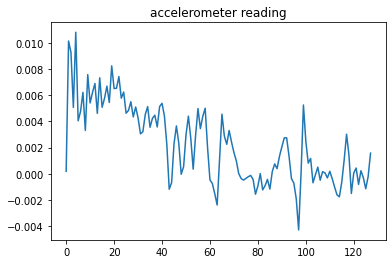

In [54]:
plt.title('accelerometer reading')
plt.plot(df[df["id"] == 0].set_index("time").value)
plt.show()

## Extract Features

In [55]:
# only use the first 500 ids to speed up the processing
X = extract_features(df[df["id"] < 500], column_id="id", column_sort="time", impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.63s/it]


In [56]:
X.head()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,"value__matrix_profile__feature_""min""__threshold_0.98","value__matrix_profile__feature_""max""__threshold_0.98","value__matrix_profile__feature_""mean""__threshold_0.98","value__matrix_profile__feature_""median""__threshold_0.98","value__matrix_profile__feature_""25""__threshold_0.98","value__matrix_profile__feature_""75""__threshold_0.98",value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,0.290392,0.001766,0.001435,0.000011,-0.000032,0.002025,...,4.555721,4.724480,0.0,1.111900,2.837645,1.800238,1.731414,1.464639,2.113387,0.008684
1,0.0,0.0,0.0,0.0,0.022239,0.000506,0.001323,-0.000021,-0.000008,0.000110,...,4.520418,4.747206,0.0,0.785462,2.741869,1.615160,1.608568,1.329079,1.895041,0.005250
2,0.0,0.0,0.0,0.0,0.054796,0.001106,0.001827,-0.000011,0.000001,0.000627,...,4.409911,4.735843,0.0,0.913254,3.107882,1.692529,1.614387,1.329484,1.952855,0.007916
3,0.0,0.0,0.0,0.0,0.042157,0.000932,0.001470,0.000014,0.000003,0.000269,...,4.335833,4.686101,0.0,0.897427,2.796923,1.656214,1.683194,1.404298,1.864329,0.007687
4,0.0,0.0,0.0,0.0,-0.024980,0.000525,0.001215,-0.000027,-0.000007,-0.000144,...,4.350795,4.656301,0.0,1.231613,2.762502,1.926316,1.957036,1.647432,2.165181,0.004961


## Train and evaluate classifier

For later comparison, we train a decision tree on all features (without selection):

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y[:500], test_size=.2)

In [58]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_test)))

              precision    recall  f1-score   support

           1       0.81      0.91      0.86        23
           2       0.88      0.93      0.90        15
           3       1.00      0.73      0.85        15
           4       0.46      0.33      0.39        18
           5       0.35      0.43      0.39        14
           6       0.35      0.40      0.38        15

    accuracy                           0.64       100
   macro avg       0.64      0.62      0.63       100
weighted avg       0.65      0.64      0.64       100



# Multiclass feature selection

We will now select a subset of relevant features using the `tsfresh` select features method.
However it only works for binary classification or regression tasks. 

For a 6 label multi classification we therefore split the selection problem into 6 binary one-versus all classification problems. 
For each of them we can do a binary classification feature selection:

In [59]:
relevant_features = set()

for label in y.unique():
    y_train_binary = y_train == label
    X_train_filtered = select_features(X_train, y_train_binary)
    print("Number of relevant features for class {}: {}/{}".format(label, X_train_filtered.shape[1], X_train.shape[1]))
    relevant_features = relevant_features.union(set(X_train_filtered.columns))

Number of relevant features for class 5: 244/789
Number of relevant features for class 4: 218/789
Number of relevant features for class 6: 206/789
Number of relevant features for class 1: 237/789
Number of relevant features for class 3: 256/789
Number of relevant features for class 2: 179/789


In [60]:
len(relevant_features)

310

we keep only those features that we selected above, for both the train and test set

In [61]:
X_train_filtered = X_train[list(relevant_features)]
X_test_filtered = X_test[list(relevant_features)]

and train again:

In [62]:
classifier_selected = DecisionTreeClassifier()
classifier_selected.fit(X_train_filtered, y_train)
print(classification_report(y_test, classifier_selected.predict(X_test_filtered)))

              precision    recall  f1-score   support

           1       0.81      0.91      0.86        23
           2       0.81      0.87      0.84        15
           3       1.00      0.73      0.85        15
           4       0.38      0.33      0.35        18
           5       0.38      0.43      0.40        14
           6       0.27      0.27      0.27        15

    accuracy                           0.61       100
   macro avg       0.61      0.59      0.59       100
weighted avg       0.62      0.61      0.61       100



It worked! The precision improved by removing irrelevant features.

## Improved Multiclass feature selection
We can instead specify the number of classes for which a feature should be a relevant predictor in order to pass through the filtering process. This is as simple as setting the `multiclass` parameter to `True` and setting `n_significant` to the required number of classes. We will try with a requirement of being relevant for 5 classes.

In [63]:
X_train_filtered_multi = select_features(X_train, y_train, multiclass=True, n_significant=5)
X_train_filtered_multi.shape

(400, 190)

We can see that the number of relevant features is lower than the previous implementation.

In [64]:
classifier_selected_multi = DecisionTreeClassifier()
classifier_selected_multi.fit(X_train_filtered_multi, y_train)
X_test_filtered_multi = X_test[X_train_filtered_multi.columns]
print(classification_report(y_test, classifier_selected_multi.predict(X_test_filtered_multi)))

              precision    recall  f1-score   support

           1       0.95      0.87      0.91        23
           2       0.78      0.93      0.85        15
           3       1.00      0.93      0.97        15
           4       0.46      0.33      0.39        18
           5       0.50      0.43      0.46        14
           6       0.45      0.67      0.54        15

    accuracy                           0.70       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.71      0.70      0.70       100



We now get slightly better classification performance, especially for classes where the previous classifier performed poorly. The parameter `n_significant` can be tuned for best results.

# Timeseries Forecasting

This notebook explains how to use `tsfresh` in time series foreacasting.
Make sure you also read through the [documentation](https://tsfresh.readthedocs.io/en/latest/text/forecasting.html) to learn more on this feature.

We will use the stock price of Apple for this.
In this notebook we will only showcase how to work with a single time series at a time (one stock).
There exist another notebook in the `advanced` folder, which treats several stocks at the same time.
Basically the same - but a bit more complex when it comes to pandas multi-indexing.

In [65]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

try:
    import pandas_datareader.data as web
except ImportError:
    print("You need to install the pandas_datareader. Run pip install pandas_datareader.")

from sklearn.linear_model import LinearRegression

## Reading the data

We download the data from "stooq" and only store the High value.
Please note: this notebook is for showcasing `tsfresh`s feature extraction - not to predict stock market prices :-)

In [66]:
df = web.DataReader("AAPL", 'stooq')["High"]
df.head()

Date
2022-10-04    146.2200
2022-10-03    143.0700
2022-09-30    143.1000
2022-09-29    146.7200
2022-09-28    150.6414
Name: High, dtype: float64

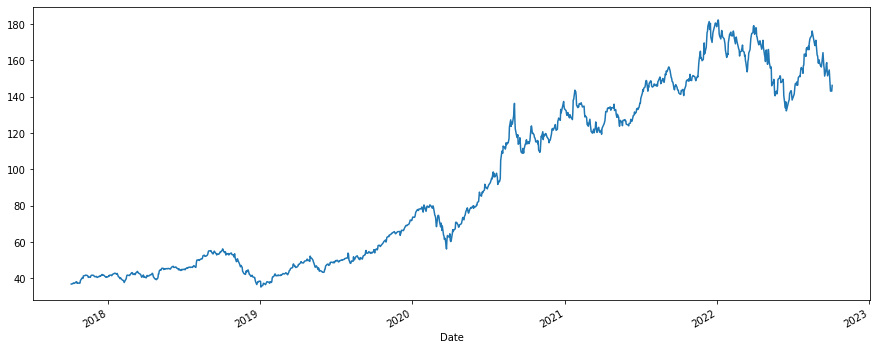

In [67]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()

We want to make the time dependency a bit clearer and add an identifier to each of the stock values (in this notebook we only have Google though).

In [68]:
df_melted = pd.DataFrame({"high": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "AAPL"

df_melted.head()

,high,date,Symbols
Date,,,
2022-10-04,146.2200,2022-10-04,AAPL
2022-10-03,143.0700,2022-10-03,AAPL
2022-09-30,143.1000,2022-09-30,AAPL
2022-09-29,146.7200,2022-09-29,AAPL
2022-09-28,150.6414,2022-09-28,AAPL


## Create training data sample

Forecasting typically involves the following steps:
* take all data up to today
* do feature extraction (e.g. by running `extract_features`)
* run a prediction model (e.g. a regressor, see below)
* use the result as the forecast for tomorrow

In training however, we need multiple examples to train.
If we would only use the time series until today (and wait for the value of tomorrow to have a target), we would only have a single training example.
Therefore we use a trick: we replay the history.

Imagine you have a cut-out window sliding over your data.
At each time step $t$, you treat the data as it would be today. 
You extract the features with everything you know until today (which is all data until and including $t$).
The target for the features until time $t$ is the time value of time $t + 1$ (which you already know, because everything has already happened).

The process of window-sliding is implemented in the function `roll_time_series`.
Our window size will be 20 (we look at max 20 days in the past) and we disregard all windows which are shorter than 5 days.

In [69]:
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:521: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  "Your time stamps are not uniformly sampled, which makes rolling "
Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]


In [70]:
df_rolled.head()

,high,date,Symbols,id
0,36.8828,2017-10-05,AAPL,"(AAPL, 2017-10-12 00:00:00)"
1,36.8928,2017-10-06,AAPL,"(AAPL, 2017-10-12 00:00:00)"
2,37.1824,2017-10-09,AAPL,"(AAPL, 2017-10-12 00:00:00)"
3,37.4899,2017-10-10,AAPL,"(AAPL, 2017-10-12 00:00:00)"
4,37.2413,2017-10-11,AAPL,"(AAPL, 2017-10-12 00:00:00)"


The resulting dataframe now consists of these "windows" stamped out of the original dataframe.
For example all data with the `id = (AAPL, 2020-07-14 00:00:00)` comes from the original data of stock `AAPL` including the last 20 days until `2020-07-14`:

In [71]:
df_rolled[df_rolled["id"] == ("AAPL", pd.to_datetime("2020-07-14"))]

,high,date,Symbols,id
14391,85.2366,2020-06-15,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14392,87.0890,2020-06-16,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14393,87.6323,2020-06-17,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14394,87.1509,2020-06-18,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14395,87.9199,2020-06-19,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14396,88.6319,2020-06-22,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14397,91.8205,2020-06-23,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14398,90.9337,2020-06-24,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14399,89.9980,2020-06-25,AAPL,"(AAPL, 2020-07-14 00:00:00)"
14400,90.0769,2020-06-26,AAPL,"(AAPL, 2020-07-14 00:00:00)"


In [72]:
df_melted[(df_melted["date"] <= pd.to_datetime("2020-07-14")) & 
          (df_melted["date"] >= pd.to_datetime("2020-06-15")) & 
          (df_melted["Symbols"] == "AAPL")]

,high,date,Symbols
Date,,,
2020-07-14,95.9208,2020-07-14,AAPL
2020-07-13,98.5911,2020-07-13,AAPL
2020-07-10,94.6645,2020-07-10,AAPL
2020-07-09,94.9980,2020-07-09,AAPL
2020-07-08,94.0663,2020-07-08,AAPL
2020-07-07,93.3573,2020-07-07,AAPL
2020-07-06,92.6553,2020-07-06,AAPL
2020-07-02,91.3471,2020-07-02,AAPL
2020-07-01,90.5812,2020-07-01,AAPL


If you now group by the new `id` column, each of the groups will be a certain stock symbol until and including the data until a certain day (and including the last 20 days in the past).

Whereas we started with 1259 data samples:

In [73]:
len(df_melted)

1258

we now have 1254 unique windows (identified by stock symbol and ending date):

In [74]:
df_rolled["id"].nunique()

1253

We "lost" 5 windows, as we required to have a minimum history of more than 5 days.

In [75]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

The process is also shown in this image (please note that the window size is smaller for better visibility):

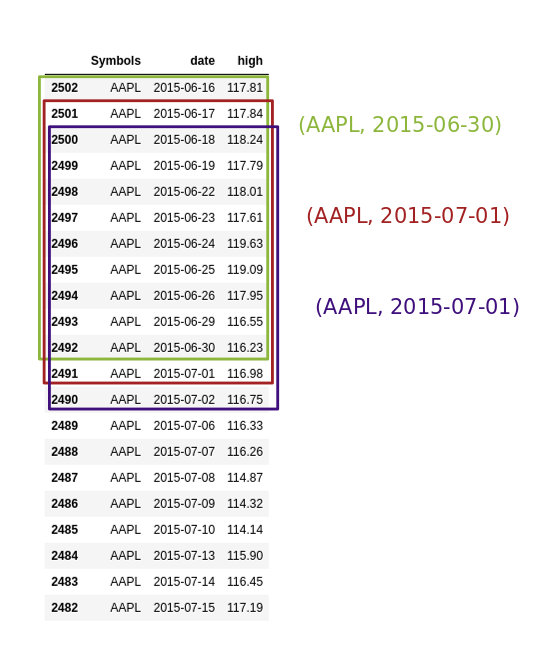

## Extract Features

The rolled (windowed) data sample is now in the correct format to use it for `tsfresh`s feature extraction.
As normal, features will be extracted using all data for a given `id`, which is in our case all data of a given window and a given id (one colored box in the graph above).

If the feature extraction returns a row with the index `(AAPL, 2020-07-14 00:00:00)`, you know it has been calculated using the `AAPL` data up and including `2020-07-14` (and 20 days of history).

In [76]:
X = extract_features(df_rolled.drop("Symbols", axis=1), 
                     column_id="id", column_sort="date", column_value="high", 
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


In [77]:
X.head()

high__variance_larger_than_standard_deviation  \
AAPL 2017-10-12                                            0.0   
     2017-10-13                                            0.0   
     2017-10-16                                            0.0   
     2017-10-17                                            0.0   
     2017-10-18                                            0.0   

                 high__has_duplicate_max  high__has_duplicate_min  \
AAPL 2017-10-12                      0.0                      0.0   
     2017-10-13                      0.0                      0.0   
     2017-10-16                      0.0                      0.0   
     2017-10-17                      0.0                      0.0   
     2017-10-18                      0.0                      0.0   

                 high__has_duplicate  high__sum_values  high__abs_energy  \
AAPL 2017-10-12                  0.0          223.0283       8290.565914   
     2017-10-13                  0.0          260.3455       9683.139330   
     2017-10-16                  0.0          298.3068      11124.199627   
     2017-10-17                  0.0          336.4748      12580.995851   
     2017-10-18                  0.0          374.6058      14034.969012   

                 high__mean_abs_change  high__mean_change  \
AAPL 2017-10-12               0.190700           0.091260   
     2017-10-13               0.162567           0.072400   
     2017-10-16               0.231357           0.154071   
     2017-10-17               0.228275           0.160650   
     2017-10-18               0.207022           0.138689   

                 high__mean_second_derivative_central  high__median  ...  \
AAPL 2017-10-12                              0.010975      37.21185  ...   
     2017-10-13                             -0.003190      37.24130  ...   
     2017-10-16                              0.052842      37.27925  ...   
     2017-10-17                              0.014050      37.31720  ...   
     2017-10-18                             -0.002937      37.32815  ...   

                 high__permutation_entropy__dimension_6__tau_1  \
AAPL 2017-10-12                                      -0.000000   
     2017-10-13                                       0.693147   
     2017-10-16                                       1.098612   
     2017-10-17                                       1.386294   
     2017-10-18                                       1.609438   

                 high__permutation_entropy__dimension_7__tau_1  \
AAPL 2017-10-12                                       2.708050   
     2017-10-13                                      -0.000000   
     2017-10-16                                       0.693147   
     2017-10-17                                       1.098612   
     2017-10-18                                       1.386294   

                 high__query_similarity_count__query_None__threshold_0.0  \
AAPL 2017-10-12                                                0.0         
     2017-10-13                                                0.0         
     2017-10-16                                                0.0         
     2017-10-17                                                0.0         
     2017-10-18                                                0.0         

                 high__matrix_profile__feature_"min"__threshold_0.98  \
AAPL 2017-10-12                                           1.441607     
     2017-10-13                                           1.441607     
     2017-10-16                                           1.441607     
     2017-10-17                                           1.441607     
     2017-10-18                                           1.441607     

                 high__matrix_profile__feature_"max"__threshold_0.98  \
AAPL 2017-10-12                                           4.775791     
     2017-10-13                                           4.775791     
     2017-10-16         

We make the data a bit easier to work with by removing the tuple-index

In [78]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,"high__matrix_profile__feature_""min""__threshold_0.98","high__matrix_profile__feature_""max""__threshold_0.98","high__matrix_profile__feature_""mean""__threshold_0.98","high__matrix_profile__feature_""median""__threshold_0.98","high__matrix_profile__feature_""25""__threshold_0.98","high__matrix_profile__feature_""75""__threshold_0.98",high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2017-10-12,0.0,0.0,0.0,0.0,223.0283,8290.565914,0.190700,0.091260,0.010975,37.21185,...,-0.000000,2.708050,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,78.893986
2017-10-13,0.0,0.0,0.0,0.0,260.3455,9683.139330,0.162567,0.072400,-0.003190,37.24130,...,0.693147,-0.000000,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,78.893986
2017-10-16,0.0,0.0,0.0,0.0,298.3068,11124.199627,0.231357,0.154071,0.052842,37.27925,...,1.098612,0.693147,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.346286
2017-10-17,0.0,0.0,0.0,0.0,336.4748,12580.995851,0.228275,0.160650,0.014050,37.31720,...,1.386294,1.098612,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.528457
2017-10-18,0.0,0.0,0.0,0.0,374.6058,14034.969012,0.207022,0.138689,-0.002937,37.32815,...,1.609438,1.386294,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.663971


Our `(AAPL, 2020-07-14 00:00:00)` is also in the data again:

In [79]:
X.loc['2020-07-14']

high__variance_larger_than_standard_deviation                1.000000
high__has_duplicate_max                                      0.000000
high__has_duplicate_min                                      0.000000
high__has_duplicate                                          0.000000
high__sum_values                                          1912.213900
                                                             ...     
high__matrix_profile__feature_"mean"__threshold_0.98         2.277535
high__matrix_profile__feature_"median"__threshold_0.98       1.808076
high__matrix_profile__feature_"25"__threshold_0.98           1.630757
high__matrix_profile__feature_"75"__threshold_0.98           2.574085
high__mean_n_absolute_max__number_of_maxima_7               94.893329
Name: 2020-07-14 00:00:00, Length: 789, dtype: float64

Just to repeat: the features in this row were only calculated using the time series values of `AAPL` up to and including `2015-07-14` and the last 20 days.

## Prediction

We can now use the extracted features to train a regressor.
But what will be our targets?
The target for the row `2020-07-13` is the value on the next timestep (that would be `2020-07-14` in this case).

So all we need to do is go back to our original dataframe and take the stock value of tomorrow.
This is done with `shift`:

In [80]:
y = df_melted.set_index("date").sort_index().high.shift(-1)

Quick consistency test:

In [81]:
y["2020-07-13"], df["2020-07-14"].iloc[0]

(95.9208, 95.9208)

However, we need to be a bit careful here: `X` is missing the first 5 dates (as our minimum window size was 5) and `y` is missing the last date (as there is nothing to predict on today).
So lets make sure we have a consistent view on the data.

In [82]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

We can now train normal AdaBoostRegressors to predict the next time step .
Let's split the data into a training and testing sample (but make sure to keep temporal consistency).
We take everything until 2019 as train data an the rest as test:

In [83]:
X[:"2018"]

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,"high__matrix_profile__feature_""min""__threshold_0.98","high__matrix_profile__feature_""max""__threshold_0.98","high__matrix_profile__feature_""mean""__threshold_0.98","high__matrix_profile__feature_""median""__threshold_0.98","high__matrix_profile__feature_""25""__threshold_0.98","high__matrix_profile__feature_""75""__threshold_0.98",high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2017-10-12,0.0,0.0,0.0,0.0,223.0283,8290.565914,0.190700,0.091260,0.010975,37.21185,...,-0.000000,2.708050,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,78.893986
2017-10-13,0.0,0.0,0.0,0.0,260.3455,9683.139330,0.162567,0.072400,-0.003190,37.24130,...,0.693147,-0.000000,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,78.893986
2017-10-16,0.0,0.0,0.0,0.0,298.3068,11124.199627,0.231357,0.154071,0.052842,37.27925,...,1.098612,0.693147,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.346286
2017-10-17,0.0,0.0,0.0,0.0,336.4748,12580.995851,0.228275,0.160650,0.014050,37.31720,...,1.386294,1.098612,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.528457
2017-10-18,0.0,0.0,0.0,0.0,374.6058,14034.969012,0.207022,0.138689,-0.002937,37.32815,...,1.609438,1.386294,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,37.663971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.0,0.0,0.0,0.0,874.4064,36489.023837,0.668570,-0.302880,-0.031458,41.70910,...,2.566599,2.615631,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,43.618414
2018-12-26,1.0,0.0,0.0,0.0,869.7209,36110.979424,0.717005,-0.214105,0.037266,41.55030,...,2.479956,2.615631,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,43.554786
2018-12-27,1.0,0.0,0.0,0.0,865.3270,35758.726173,0.720395,-0.217495,-0.044595,41.52030,...,2.479956,2.615631,0.0,1.441607,4.775791,2.277535,1.808076,1.630757,2.574085,43.548500


In [84]:
X_train = X[:"2018"]
X_test = X["2019":]

y_train = y[:"2018"]
y_test = y["2019":]

and do feature selection before training

In [85]:
X_train_selected = select_features(X_train, y_train)

In [86]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

Now lets check how good our prediction is:

In [87]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

The prediction is for the next day, so for drawing we need to shift 1 step back:

<AxesSubplot:xlabel='last_date'>

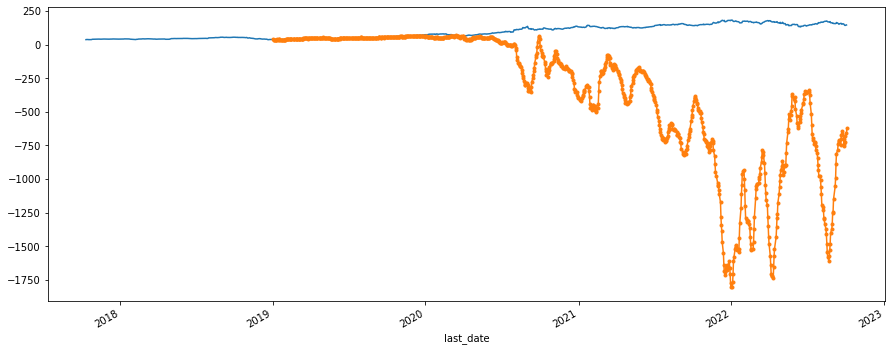

In [88]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")

Well, clearly not perfect ;-)

# Referencias

Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H., Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing. Behavior Research Methods, 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y



The TSFRESH package is described in the following open access paper:

Christ, M., Braun, N., Neuffer, J., and Kempa-Liehr A.W. (2018). Time Series FeatuRe Extraction on basis of Scalable Hypothesis tests (tsfresh -- A Python package). Neurocomputing 307 (2018) 72-77, doi: 10.1016/j.neucom.2018.03.067.
The FRESH algorithm is described in the following whitepaper:

Christ, M., Kempa-Liehr, A.W., and Feindt, M. (2017). Distributed and parallel time series feature extraction for industrial big data applications. ArXiv e-print 1610.07717, https://arxiv.org/abs/1610.07717.



Barandas, Marília and Folgado, Duarte, et al. "TSFEL: Time Series Feature Extraction Library." SoftwareX 11 (2020). https://doi.org/10.1016/j.softx.2020.100456

In [ ]:
# Usar no terminal( na pasta)
# jupyter nbconvert AP.ipynb --to slides --post serve